# Filling out incomplete coloc groupings 
I found some groupings that were incomplete; that is a certain groupings were defined only by a number of pairwise relationships that is less than nC2 (n choose 2) relaionships for a grouping of n stain types. AG confirmed or amended these groupings and here I will stitch togeter the final set and begin asking some our more interesting coloc questions discussed in the previous notebook.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import sys
import statsmodels.api as sm 
from statsmodels.formula.api import ols 

# loading some functions we wrote before
sys.path.append("/Users/jonathanramos/Desktop/LRI/Image ROI Data Wrangling/")
from clean import *
from norm import *
from count import *

/var/folders/b2/3h2lpxx14kgb12pp_7pltxnc0000gn/T/ipykernel_99650/543169497.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Loading in sets

We want to merge these sets so that all cells have fully updated groups (sets of unique cell roi ids) that they are associated with. Then we can build new dummy cols and start digging into the data.

We also have the following updated unpaired doubles:

- KET-10-12_PFC_3.9_C: expected the following missing pairs: [('0-FFF-00061_Npas4', '0-005-00025_cFos')] YES
- KET-10-3_PFC_3.5_C: expected the following missing pairs: [('0-FFF-00064_Npas4', '0-FFF-00070_cFos')] YES
- KET-10-3_PFC_3.7_D: expected the following missing pairs: [('0-FFF-00048_Npas4', '0-005-00024_cFos’)] YES
- KET-8-2_PFC_4.0_A: expected the following missing pairs: [('0-FFF-00103_Npas4', '0-005-00015_cFos’)] YES
- PE-11-1_PFC_3.6_B: expected the following missing pairs: [('0-200-00007_Npas4', '0-005-00026_cFos')] NO
- PE-11-3_PFC_3.5_C: expected the following missing pairs: [('0-200-00000_Npas4', '0-FFF-00033_cFos')] NO
- PE-11-5_PFC_3.7_D: expected the following missing pairs: [('0-FFF-00022_Npas4', '0-FFF-00004_cFos’)] YES

## Full cleaned set from previous notebook

In [2]:
df_coloc = pd.read_csv('KET-VR5_COLOC_FULL_DB.csv')

# let's take a look
print(df_coloc.shape)
print(df_coloc.columns)
df_coloc

(22798, 19)
Index(['Unnamed: 0', 'roi_id', 'coloc_w/_PV', 'coloc_w/_cFos',
       'coloc_w/_Npas4', 'coloc_w/_WFA', 'CoM_x', 'CoM_y', 'background',
       'mean_intensity', 'filename', 'rat_n', 'treatment', 'stain_type',
       'image_name', 'dummy_PV', 'dummy_cFos', 'dummy_Npas4', 'dummy_WFA'],
      dtype='object')


Unnamed: 0          roi_id coloc_w/_PV     coloc_w/_cFos  \
0               0  0-000-00000_PV           -                 -   
1               1  0-000-00001_PV           -  0-FFF-00070_cFos   
2               2  0-000-00002_PV           -                 -   
3               3  0-000-00003_PV           -                 -   
4               4  0-000-00004_PV           -                 -   
...           ...             ...         ...               ...   
22793           0               -           -                 -   
22794           8               -           -                 -   
22795           9               -           -                 -   
22796          10               -           -                 -   
22797          11               -           -                 -   

          coloc_w/_Npas4     coloc_w/_WFA   CoM_x   CoM_y  background  \
0      0-FFF-00045_Npas4  0-FFF-00004_WFA  297.86  425.97    238.8715   
1      0-FFF-00012_Npas4                -  340.47   43.89    238.8715   
2      0-FFF-00044_Npas4  0-FFF-00005_WFA  154.85  476.15    238.8715   
3      0-FFF-00082_Npas4  0-FFF-00003_WFA  310.10  308.22    238.8715   
4                      -                -   44.35  323.64    238.8715   
...                  ...              ...     ...     ...         ...   
22793                  -                -  177.27   68.60     93.9887   
22794                  -                -  164.01  117.08    111.9724   
22795                  -                -  197.94  107.45    111.9724   
22796                  -                -  229.32   96.22    111.9724   
22797                  -                -  261.34   98.06    111.9724   

       mean_intensity                   filename      rat_n treatment  \
0            536.8331  KET-10-12_PFC_3.7_A_2.tif  KET-10-12   FR1_KET   
1            314.9278  KET-10-12_PFC_3.7_A_2.tif  KET-10-12   FR1_KET   
2            324.0556  KET-10-12_PFC_3.7_A_2.tif  KET-10-12   FR1_KET   
3            346.0313  KET-10-12_PFC_3.7_A_2.tif  KET-10-12   FR1_KET   
4            429.6127  KET-10-12_PFC_3.7_A_2.tif  KET-10-12   FR1_KET   
...               ...                        ...        ...       ...   
22793         88.2249   PE-13-11_PFC_3.3_C_5.tif   PE-13-11   VR5_SAL   
22794        146.2031   PE-13-11_PFC_3.5_D_5.tif   PE-13-11   VR5_SAL   
22795        123.3614   PE-13-11_PFC_3.5_D_5.tif   PE-13-11   VR5_SAL   
22796        108.3670   PE-13-11_PFC_3.5_D_5.tif   PE-13-11   VR5_SAL   
22797        106.3260   PE-13-11_PFC_3.5_D_5.tif   PE-13-11   VR5_SAL   

      stain_type           image_name  dummy_PV  dummy_cFos  dummy_Npas4  \
0             PV  KET-10-12_PFC_3.7_A     False       False         True   
1             PV  KET-10-12_PFC_3.7_A     False        True         True   
2             PV  KET-10-12_PFC_3.7_A     False       False         True   
3             PV  KET-10-12_PFC_3.7_A     False       False         True   
4             PV  KET-10-12_PFC_3.7_A     False       False        False   
...          ...                  ...       ...         ...          ...   
22793        WFA   PE-13-11_PFC_3.3_C     False       False        False   
22794        WFA   PE-13-11_PFC_3.5_D     False       False        False   
22795        WFA   PE-13-11_PFC_3.5_D     False       False        False   
22796        WFA   PE-13-11_PFC_3.5_D     False       False        False   
22797        WFA   PE-13-11_PFC_3.5_D     False       False        False   

       dummy_WFA  
0           True  
1          False  
2           True  
3           True  
4          False  
...          ...  
22793      False  
22794      False  
22795      False  
22796      False  
22797      False  

[22798 rows x 19 columns]

## Amended groupings, confirmed by visual inspection of images

In [3]:
# reading in our set of amended groupings
paired_quads = pd.read_csv('PAIRED_unpaired_triples_quads/unpaired_quads.csv')
paired_triples = pd.read_csv('PAIRED_unpaired_triples_quads/unpaired_triples.csv')

# from the text above, building a df of amended doubles
doubles = [
    ('KET-10-12_PFC_3.9_C', ('0-FFF-00061_Npas4', '0-005-00025_cFos'), True), #YES
    ('KET-10-3_PFC_3.5_C', ('0-FFF-00064_Npas4', '0-FFF-00070_cFos'), True), #YES
    ('KET-10-3_PFC_3.7_D', ('0-FFF-00048_Npas4', '0-005-00024_cFos'), True), #YES
    ('KET-8-2_PFC_4.0_A', ('0-FFF-00103_Npas4', '0-005-00015_cFos'), True), #YES
    ('PE-11-1_PFC_3.6_B', ('0-200-00007_Npas4', '0-005-00026_cFos'), False), #NO
    ('PE-11-3_PFC_3.5_C', ('0-200-00000_Npas4', '0-FFF-00033_cFos'), False), #NO
    ('PE-11-5_PFC_3.7_D', ('0-FFF-00022_Npas4', '0-FFF-00004_cFos'), True) #YES
    ]

paired_doubles = pd.DataFrame(doubles, columns = ['image_name', 'grouping', 'correct_grouping'])

# standardizing "Correct grouping? (yes/no)" col name
paired_triples['correct_grouping'] = paired_triples['Correct grouping? (yes/no)']\
    .apply(lambda x: True if x.lower() == 'yes' else False)
paired_quads['correct_grouping'] = paired_quads['Correct grouping? (yes/no)']\
    .apply(lambda x: True if x.lower() == 'yes' else False)

# interpretting grouping string as python object
sort_order = {'PV': 0, 'cFos': 1, 'Npas4': 2, 'WFA': 3}
paired_quads['grouping'] = paired_quads.grouping.apply(
    lambda x: tuple(sorted(list(ast.literal_eval(x)),\
                            key=lambda y: sort_order[y.split('_')[-1]])))

paired_triples['grouping'] = paired_triples.grouping.apply(
    lambda x: tuple(sorted(list(ast.literal_eval(x)),\
                            key=lambda y: sort_order[y.split('_')[-1]])))

# converting amended grouping cols to tuples from strings
for col in [c for c in paired_triples.columns if 'amended' in c]:
    paired_triples[col] = paired_triples[col].apply(
        lambda x: tuple(sorted(
            x.replace("'", "").replace(' ', '').strip(',').split(','),\
                  key=lambda y: sort_order[y.split('_')[-1]]
            )) if type(x) == str else x)
    
for col in [c for c in paired_quads.columns if 'amended' in c]:
    paired_quads[col] = paired_quads[col].apply(
        lambda x: tuple(sorted(
            x.replace("'", "").replace(' ', '').strip(',').split(','),\
                  key=lambda y: sort_order[y.split('_')[-1]]
            )) if type(x) == str else x)
    
# building new roi_id col by exploding out grouping col
paired_doubles['roi_id'] = paired_doubles.grouping
paired_doubles = paired_doubles.explode('roi_id').reset_index()

paired_triples['roi_id'] = paired_triples.grouping
paired_triples = paired_triples.explode('roi_id').reset_index()

paired_quads['roi_id'] = paired_quads.grouping
paired_quads = paired_quads.explode('roi_id').reset_index()

# aggregating amended grouping columns into one 
def agg_amend_dbls(x):
    if x.correct_grouping:
        return x.grouping
    else:
        return tuple([x.roi_id])

def agg_amend(x):
    # first check if correct grouping; if it is, return grouping
    if x.correct_grouping:
        return x.grouping
    
    # else, get grouping from amended grouping col where roi_id occurs
    elif not x.correct_grouping:
        roi_id = x.roi_id
        grps = x[[i for i in x.index if 'amended' in i]].values
        grps = grps[~pd.isna(grps)]
        amended_grp = [grp for grp in grps if roi_id in grp]

        # for debugging
        if len(amended_grp) != 1:
            print(x)

        return amended_grp[0]

# apply aggregation function
paired_doubles['true_grouping'] = paired_doubles.apply(agg_amend_dbls, axis=1)
paired_triples['true_grouping'] = paired_triples.apply(agg_amend, axis=1)
paired_quads['true_grouping'] = paired_quads.apply(agg_amend, axis=1)

# let's take a look!
print(paired_quads.shape)
paired_quads.head()

(484, 13)


index  Unnamed: 0           image_name  \
0      0           0  KET-10-12_PFC_3.7_A   
1      0           0  KET-10-12_PFC_3.7_A   
2      0           0  KET-10-12_PFC_3.7_A   
3      0           0  KET-10-12_PFC_3.7_A   
4      1           1  KET-10-12_PFC_3.7_A   

                                            grouping  \
0  (0-000-00012_PV, 0-005-00036_cFos, 0-FFF-00009...   
1  (0-000-00012_PV, 0-005-00036_cFos, 0-FFF-00009...   
2  (0-000-00012_PV, 0-005-00036_cFos, 0-FFF-00009...   
3  (0-000-00012_PV, 0-005-00036_cFos, 0-FFF-00009...   
4  (0-000-00000_PV, 0-005-00015_cFos, 0-FFF-00045...   

  Correct grouping? (yes/no)  \
0                        yes   
1                        yes   
2                        yes   
3                        yes   
4                         no   

                                  amended grouping_1   amended grouping_2  \
0                                                NaN                  NaN   
1                                                NaN                  NaN   
2                                                NaN                  NaN   
3                                                NaN                  NaN   
4  (0-000-00000_PV, 0-FFF-00045_Npas4, 0-FFF-0000...  (0-005-00015_cFos,)   

  amended grouping_3  ameded grouping_4 notes  correct_grouping  \
0                NaN                NaN   NaN              True   
1                NaN                NaN   NaN              True   
2                NaN                NaN   NaN              True   
3                NaN                NaN   NaN              True   
4                NaN                NaN   NaN             False   

              roi_id                                      true_grouping  
0     0-000-00012_PV  (0-000-00012_PV, 0-005-00036_cFos, 0-FFF-00009...  
1   0-005-00036_cFos  (0-000-00012_PV, 0-005-00036_cFos, 0-FFF-00009...  
2  0-FFF-00009_Npas4  (0-000-00012_PV, 0-005-00036_cFos, 0-FFF-00009...  
3    0-FFF-00001_WFA  (0-000-00012_PV, 0-005-00036_cFos, 0-FFF-00009...  
4     0-000-00000_PV  (0-000-00000_PV, 0-FFF-00045_Npas4, 0-FFF-0000...

### selecting only the necessary cols, aggregating across amended quads/triples/doubles

In [4]:
paired_quads = paired_quads[['image_name', 'roi_id','true_grouping']]
paired_triples = paired_triples[['image_name', 'roi_id','true_grouping']]
paired_doubles = paired_doubles[['image_name', 'roi_id','true_grouping']]


df_amended = pd.concat([paired_quads, paired_triples, paired_doubles])
df_amended = df_amended.groupby(by=['image_name', 'roi_id'])[['image_name', 'roi_id', 'true_grouping']]\
    .apply(lambda x: sorted(list(x.true_grouping.values), key=len)[0])\
    .reset_index(name='true_grouping')

df_amended

image_name             roi_id  \
0    KET-10-12_PFC_3.7_A     0-000-00000_PV   
1    KET-10-12_PFC_3.7_A     0-000-00001_PV   
2    KET-10-12_PFC_3.7_A     0-000-00012_PV   
3    KET-10-12_PFC_3.7_A     0-000-00013_PV   
4    KET-10-12_PFC_3.7_A   0-005-00015_cFos   
..                   ...                ...   
879    PE-13-9_PFC_3.3_C  0-FFF-00057_Npas4   
880    PE-13-9_PFC_3.5_E     0-000-00001_PV   
881    PE-13-9_PFC_3.5_E    0-FFF-00005_WFA   
882    PE-13-9_PFC_3.5_E   0-FFF-00034_cFos   
883    PE-13-9_PFC_3.5_E  0-FFF-00040_Npas4   

                                         true_grouping  
0    (0-000-00000_PV, 0-FFF-00045_Npas4, 0-FFF-0000...  
1                  (0-000-00001_PV, 0-FFF-00012_Npas4)  
2    (0-000-00012_PV, 0-005-00036_cFos, 0-FFF-00009...  
3                   (0-000-00013_PV, 0-005-00019_cFos)  
4                                  (0-005-00015_cFos,)  
..                                                 ...  
879  (0-000-00004_PV, 0-FFF-00057_Npas4, 0-FFF-0000...  
880  (0-000-00001_PV, 0-FFF-00034_cFos, 0-FFF-00005...  
881  (0-000-00001_PV, 0-FFF-00034_cFos, 0-FFF-00005...  
882  (0-000-00001_PV, 0-FFF-00034_cFos, 0-FFF-00005...  
883                               (0-FFF-00040_Npas4,)  

[884 rows x 3 columns]

# Replacing old groupings with new amended groupings

## Building out a grouping col in our full df

In [5]:
sort_order = {'PV': 0, 'cFos': 1, 'Npas4': 2, 'WFA': 3}

images = []
for image in df_coloc.image_name.unique():

    # slice out image
    df_image = df_coloc.query(f'image_name == "{image}"').copy().reset_index().drop('index', axis=1)

    # build new grouping col of sorted tuples
    df_image['grouping'] = df_image.apply(\
        lambda x: tuple(sorted([\
            y for y in [x.roi_id, x['coloc_w/_PV'], x['coloc_w/_cFos'], x['coloc_w/_Npas4'], x['coloc_w/_WFA']] if not y == '-'],\
                key=lambda y: sort_order[y.split('_')[-1]])
    ), axis=1)

    # drop old dummy cols (these will be updated once i recieve updated coloc data from AG)
    df_image = df_image[[col for col in df_image.columns if not 'dummy' in col]]
    images.append(df_image)

images[0]

Unnamed: 0           roi_id     coloc_w/_PV     coloc_w/_cFos  \
0             0   0-000-00000_PV               -                 -   
1             1   0-000-00001_PV               -  0-FFF-00070_cFos   
2             2   0-000-00002_PV               -                 -   
3             3   0-000-00003_PV               -                 -   
4             4   0-000-00004_PV               -                 -   
..          ...              ...             ...               ...   
204         204  0-FFF-00002_WFA  0-000-00008_PV  0-005-00017_cFos   
205         205  0-FFF-00003_WFA  0-000-00003_PV                 -   
206         206  0-FFF-00004_WFA  0-000-00000_PV  0-005-00015_cFos   
207         207  0-FFF-00005_WFA  0-000-00002_PV                 -   
208         208  0-FFF-00006_WFA  0-000-00005_PV                 -   

        coloc_w/_Npas4     coloc_w/_WFA   CoM_x   CoM_y  background  \
0    0-FFF-00045_Npas4  0-FFF-00004_WFA  297.86  425.97    238.8715   
1    0-FFF-00012_Npas4                -  340.47   43.89    238.8715   
2    0-FFF-00044_Npas4  0-FFF-00005_WFA  154.85  476.15    238.8715   
3    0-FFF-00082_Npas4  0-FFF-00003_WFA  310.10  308.22    238.8715   
4                    -                -   44.35  323.64    238.8715   
..                 ...              ...     ...     ...         ...   
204  0-FFF-00062_Npas4                -  172.04  315.17    115.7134   
205  0-FFF-00082_Npas4                -  311.54  305.09    115.7134   
206  0-FFF-00045_Npas4                -  297.09  427.72    115.7134   
207  0-FFF-00044_Npas4                -  157.10  478.13    115.7134   
208  0-FFF-00041_Npas4                -   47.44  466.73    115.7134   

     mean_intensity                   filename      rat_n treatment  \
0          536.8331  KET-10-12_PFC_3.7_A_2.tif  KET-10-12   FR1_KET   
1          314.9278  KET-10-12_PFC_3.7_A_2.tif  KET-10-12   FR1_KET   
2          324.0556  KET-10-12_PFC_3.7_A_2.tif  KET-10-12   FR1_KET   
3          346.0313  KET-10-12_PFC_3.7_A_2.tif  KET-10-12   FR1_KET   
4          429.6127  KET-10-12_PFC_3.7_A_2.tif  KET-10-12   FR1_KET   
..              ...                        ...        ...       ...   
204        126.9843  KET-10-12_PFC_3.7_A_5.tif  KET-10-12   FR1_KET   
205        110.1349  KET-10-12_PFC_3.7_A_5.tif  KET-10-12   FR1_KET   
206        122.0008  KET-10-12_PFC_3.7_A_5.tif  KET-10-12   FR1_KET   
207        115.3184  KET-10-12_PFC_3.7_A_5.tif  KET-10-12   FR1_KET   
208        114.0730  KET-10-12_PFC_3.7_A_5.tif  KET-10-12   FR1_KET   

    stain_type           image_name  \
0           PV  KET-10-12_PFC_3.7_A   
1           PV  KET-10-12_PFC_3.7_A   
2           PV  KET-10-12_PFC_3.7_A   
3           PV  KET-10-12_PFC_3.7_A   
4           PV  KET-10-12_PFC_3.7_A   
..         ...                  ...   
204        WFA  KET-10-12_PFC_3.7_A   
205        WFA  KET-10-12_PFC_3.7_A   
206        WFA  KET-10-12_PFC_3.7_A   
207        WFA  KET-10-12_PFC_3.7_A   
208        WFA  KET-10-12_PFC_3.7_A   

                                              grouping  
0    (0-000-00000_PV, 0-FFF-00045_Npas4, 0-FFF-0000...  
1    (0-000-00001_PV, 0-FFF-00070_cFos, 0-FFF-00012...  
2    (0-000-00002_PV, 0-FFF-00044_Npas4, 0-FFF-0000...  
3    (0-000-00003_PV, 0-FFF-00082_Npas4, 0-FFF-0000...  
4                                    (0-000-00004_PV,)  
..                                                 ...  
204  (0-000-00008_PV, 0-005-00017_cFos, 0-FFF-00062...  
205  (0-000-00003_PV, 0-FFF-00082_Npas4, 0-FFF-0000...  
206  (0-000-00000_PV, 0-005-00015_cFos, 0-FFF-00045...  
207  (0-000-00002_PV, 0-FFF-00044_Npas4, 0-FFF-0000...  
208  (0-000-00005_PV, 0-FFF-00041_Npas4, 0-FFF-0000...  

[209 rows x 16 columns]

## Replace with amended groupings

In [6]:
def replace_amended_groupings(x):
    iid = x.image_name
    rid = x.roi_id
    q = df_amended.query(f'image_name == "{iid}" and roi_id == "{rid}"')

    if not q.empty:
        # for debuggin (we expect len of exactly 1 here)
        if len(q) > 1:
            print(q)
        return q.true_grouping.values[0]
    
    elif q.empty:
        return x.grouping
    
df_coloc = pd.concat(images)
df_coloc['true_grouping'] = df_coloc.apply(replace_amended_groupings, axis=1)
df_coloc

Unnamed: 0           roi_id     coloc_w/_PV     coloc_w/_cFos  \
0             0   0-000-00000_PV               -                 -   
1             1   0-000-00001_PV               -  0-FFF-00070_cFos   
2             2   0-000-00002_PV               -                 -   
3             3   0-000-00003_PV               -                 -   
4             4   0-000-00004_PV               -                 -   
..          ...              ...             ...               ...   
118       22777  0-FFF-00008_WFA               -                 -   
119       22778  0-FFF-00009_WFA  0-000-00002_PV                 -   
120       22779  0-FFF-00010_WFA               -                 -   
121       22780  0-FFF-00011_WFA  0-000-00005_PV                 -   
122       22781  0-FFF-00012_WFA  0-000-00000_PV                 -   

        coloc_w/_Npas4     coloc_w/_WFA   CoM_x   CoM_y  background  \
0    0-FFF-00045_Npas4  0-FFF-00004_WFA  297.86  425.97    238.8715   
1    0-FFF-00012_Npas4                -  340.47   43.89    238.8715   
2    0-FFF-00044_Npas4  0-FFF-00005_WFA  154.85  476.15    238.8715   
3    0-FFF-00082_Npas4  0-FFF-00003_WFA  310.10  308.22    238.8715   
4                    -                -   44.35  323.64    238.8715   
..                 ...              ...     ...     ...         ...   
118                  -                -  385.12  235.30    109.6097   
119                  -                -  409.79  230.66    109.6097   
120                  -                -  300.24  100.38    109.6097   
121                  -                -  414.17   44.01    109.6097   
122  0-FFF-00002_Npas4                -  203.68   49.91    109.6097   

     mean_intensity                   filename      rat_n treatment  \
0          536.8331  KET-10-12_PFC_3.7_A_2.tif  KET-10-12   FR1_KET   
1          314.9278  KET-10-12_PFC_3.7_A_2.tif  KET-10-12   FR1_KET   
2          324.0556  KET-10-12_PFC_3.7_A_2.tif  KET-10-12   FR1_KET   
3          346.0313  KET-10-12_PFC_3.7_A_2.tif  KET-10-12   FR1_KET   
4          429.6127  KET-10-12_PFC_3.7_A_2.tif  KET-10-12   FR1_KET   
..              ...                        ...        ...       ...   
118        119.2211    PE-13-9_PFC_4.0_B_5.tif    PE-13-9   VR5_SAL   
119        128.8761    PE-13-9_PFC_4.0_B_5.tif    PE-13-9   VR5_SAL   
120        123.8280    PE-13-9_PFC_4.0_B_5.tif    PE-13-9   VR5_SAL   
121        120.4709    PE-13-9_PFC_4.0_B_5.tif    PE-13-9   VR5_SAL   
122        112.7066    PE-13-9_PFC_4.0_B_5.tif    PE-13-9   VR5_SAL   

    stain_type           image_name  \
0           PV  KET-10-12_PFC_3.7_A   
1           PV  KET-10-12_PFC_3.7_A   
2           PV  KET-10-12_PFC_3.7_A   
3           PV  KET-10-12_PFC_3.7_A   
4           PV  KET-10-12_PFC_3.7_A   
..         ...                  ...   
118        WFA    PE-13-9_PFC_4.0_B   
119        WFA    PE-13-9_PFC_4.0_B   
120        WFA    PE-13-9_PFC_4.0_B   
121        WFA    PE-13-9_PFC_4.0_B   
122        WFA    PE-13-9_PFC_4.0_B   

                                              grouping  \
0    (0-000-00000_PV, 0-FFF-00045_Npas4, 0-FFF-0000...   
1    (0-000-00001_PV, 0-FFF-00070_cFos, 0-FFF-00012...   
2    (0-000-00002_PV, 0-FFF-00044_Npas4, 0-FFF-0000...   
3    (0-000-00003_PV, 0-FFF-00082_Npas4, 0-FFF-0000...   
4                                    (0-000-00004_PV,)   
..                                                 ...   
118                                 (0-FFF-00008_WFA,)   
119                  (0-000-00002_PV, 0-FFF-00009_WFA)   
120                                 (0-FFF-00010_WFA,)   
121                  (0-000-00005_PV, 0-FFF-00011_WFA)   
122  (0-000-00000_PV, 0-FFF-00002_Npas4, 0-FFF-0001...   

                                         true_grouping  
0    (0-000-00000_PV, 0-FFF-00045_Npas4, 0-FFF-0000...  
1                  (0-000-00001_PV, 0-FFF-00012_Npas4)  
2    (0-000-00002_PV, 0-FFF-00044_Npas4, 0-FFF-0000...  
3    (0-000-00003_PV, 0-FFF-00082_Npas4, 0-FFF-0000...  
4      

## building new dummy cols

In [7]:
def get_dummies(x):
    groupings = [rid.split('_')[-1] for rid in x]

    dummy_PV = False
    dummy_cFos = False
    dummy_Npas4 = False
    dummy_WFA = False

    if 'PV' in groupings:
        dummy_PV = True
    if 'cFos' in groupings:
        dummy_cFos = True
    if 'Npas4' in groupings:
        dummy_Npas4 = True
    if 'WFA' in groupings:
        dummy_WFA = True

    return dummy_PV, dummy_cFos, dummy_Npas4, dummy_WFA

df_coloc['dummy'] = df_coloc.true_grouping.apply(get_dummies)
df_coloc['dummy_PV'], df_coloc['dummy_cFos'], df_coloc['dummy_Npas4'], df_coloc['dummy_WFA'] = zip(*df_coloc['dummy'])

Some interesting timeit tests

In [8]:
%timeit df_coloc['dummy_PV'], df_coloc['dummy_cFos'], df_coloc['dummy_Npas4'], df_coloc['dummy_WFA'] = zip(*df_coloc['dummy'])
%timeit df_coloc.assign(**dict(zip(['dummy_PV', 'dummy_cFos', 'dummy_Npas4', 'dummy_WFA'], zip(*df_coloc.dummy))))


8.42 ms ± 212 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
14.5 ms ± 348 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# Moving on to analyses
## just doing some more preliminary cleaning

In [9]:
df_coloc = df_coloc[['filename', 'image_name', 'roi_id', 'true_grouping', \
                     'dummy_PV', 'dummy_cFos', 'dummy_Npas4', 'dummy_WFA',\
                     'CoM_x', 'CoM_y', 'background', 'mean_intensity', \
                     'stain_type', 'filename', 'rat_n', 'treatment']]\
                     .copy(deep=True).reset_index()

df_coloc['group_name'] = df_coloc.rat_n.apply(lambda x: '-'.join(x.split('-')[:2]))

# drop everything from group PE-11
df_coloc = df_coloc.query('group_name != "PE-11"')

print(df_coloc.shape)
df_coloc

(18632, 18)


index                   filename           image_name           roi_id  \
0          0  KET-10-12_PFC_3.7_A_2.tif  KET-10-12_PFC_3.7_A   0-000-00000_PV   
1          1  KET-10-12_PFC_3.7_A_2.tif  KET-10-12_PFC_3.7_A   0-000-00001_PV   
2          2  KET-10-12_PFC_3.7_A_2.tif  KET-10-12_PFC_3.7_A   0-000-00002_PV   
3          3  KET-10-12_PFC_3.7_A_2.tif  KET-10-12_PFC_3.7_A   0-000-00003_PV   
4          4  KET-10-12_PFC_3.7_A_2.tif  KET-10-12_PFC_3.7_A   0-000-00004_PV   
...      ...                        ...                  ...              ...   
22793    118    PE-13-9_PFC_4.0_B_5.tif    PE-13-9_PFC_4.0_B  0-FFF-00008_WFA   
22794    119    PE-13-9_PFC_4.0_B_5.tif    PE-13-9_PFC_4.0_B  0-FFF-00009_WFA   
22795    120    PE-13-9_PFC_4.0_B_5.tif    PE-13-9_PFC_4.0_B  0-FFF-00010_WFA   
22796    121    PE-13-9_PFC_4.0_B_5.tif    PE-13-9_PFC_4.0_B  0-FFF-00011_WFA   
22797    122    PE-13-9_PFC_4.0_B_5.tif    PE-13-9_PFC_4.0_B  0-FFF-00012_WFA   

                                           true_grouping  dummy_PV  \
0      (0-000-00000_PV, 0-FFF-00045_Npas4, 0-FFF-0000...      True   
1                    (0-000-00001_PV, 0-FFF-00012_Npas4)      True   
2      (0-000-00002_PV, 0-FFF-00044_Npas4, 0-FFF-0000...      True   
3      (0-000-00003_PV, 0-FFF-00082_Npas4, 0-FFF-0000...      True   
4                                      (0-000-00004_PV,)      True   
...                                                  ...       ...   
22793                                 (0-FFF-00008_WFA,)     False   
22794                  (0-000-00002_PV, 0-FFF-00009_WFA)      True   
22795                                 (0-FFF-00010_WFA,)     False   
22796                  (0-000-00005_PV, 0-FFF-00011_WFA)      True   
22797  (0-000-00000_PV, 0-FFF-00002_Npas4, 0-FFF-0001...      True   

       dummy_cFos  dummy_Npas4  dummy_WFA   CoM_x   CoM_y  background  \
0           False         True       True  297.86  425.97    238.8715   
1           False         True      False  340.47   43.89    238.8715   
2           False         True       True  154.85  476.15    238.8715   
3           False         True       True  310.10  308.22    238.8715   
4           False        False      False   44.35  323.64    238.8715   
...           ...          ...        ...     ...     ...         ...   
22793       False        False       True  385.12  235.30    109.6097   
22794       False        False       True  409.79  230.66    109.6097   
22795       False        False       True  300.24  100.38    109.6097   
22796       False        False       True  414.17   44.01    109.6097   
22797       False         True       True  203.68   49.91    109.6097   

       mean_intensity stain_type                   filename      rat_n  \
0            536.8331         PV  KET-10-12_PFC_3.7_A_2.tif  KET-10-12   
1            314.9278         PV  KET-10-12_PFC_3.7_A_2.tif  KET-10-12   
2            324.0556         PV  KET-10-12_PFC_3.7_A_2.tif  KET-10-12   
3            346.0313         PV  KET-10-12_PFC_3.7_A_2.tif  KET-10-12   
4            429.6127         PV  KET-10-12_PFC_3.7_A_2.tif  KET-10-12   
...               ...        ...                        ...        ...   
22793        119.2211        WFA    PE-13-9_PFC_4.0_B_5.tif    PE-13-9   
22794        128.8761        WFA    PE-13-9_PFC_4.0_B_5.tif    PE-13-9   
22795        123.8280        WFA    PE-13-9_PFC_4.0_B_5.tif    PE-13-9   
22796        120.4709        WFA    PE-13-9_PFC_4.0_B_5.tif    PE-13-9   
22797        112.7066        WFA    PE-13-9_PFC_4.0_B_5.tif    PE-13-9   

      treatment group_name  
0       FR1_KET     KET-10  
1       FR1_KET     KET-10  
2       FR1_KET     KET-10  
3       FR1_KET     KET-10  
4       FR1_KET     KET-10  
...         ...        ...  
22793   VR5_SAL      PE-13  
22794   VR5_SAL      PE-13  
22795   VR5_SAL      PE-13  
22796   VR5_SAL      PE-13  
22797   VR5_SAL      PE-13  

[18632 rows x 18 columns]

## SNR Threshold

For each stain type we determined the following SNR thresholds:
- PV : 0.8
- cFos : 0
- Npas4 : 0.8
- WFA : 0.85

We did this already, but given that a whole group of animals was removed, we should repeat this step. Given that the data we loaded has already been snr thresholded, we expect the same number of cells before and after filtering.

In [10]:
def get_snr(df):
    '''
    '''
    df['snr'] = df['mean_intensity'].astype('f') / df['background'].astype('f')

    return df

def filter_snr(df, snr_cutoff):
    '''
    '''
    df_threshold = pd.concat([df.query(f'stain_type == "{stain}"').query(f'snr > {snr_cutoff[stain]}') for stain in df.stain_type.unique()])

    return df_threshold

# build dict of snr thresholds
snr_threshold = {
    'PV': 0.8,
    'cFos': 0,
    'Npas4': 0.8,
    'WFA': 0.85
}

df_coloc = filter_snr(get_snr(df_coloc), snr_threshold)

print(df_coloc.shape)
df_coloc

(18632, 19)


index                   filename           image_name           roi_id  \
0          0  KET-10-12_PFC_3.7_A_2.tif  KET-10-12_PFC_3.7_A   0-000-00000_PV   
1          1  KET-10-12_PFC_3.7_A_2.tif  KET-10-12_PFC_3.7_A   0-000-00001_PV   
2          2  KET-10-12_PFC_3.7_A_2.tif  KET-10-12_PFC_3.7_A   0-000-00002_PV   
3          3  KET-10-12_PFC_3.7_A_2.tif  KET-10-12_PFC_3.7_A   0-000-00003_PV   
4          4  KET-10-12_PFC_3.7_A_2.tif  KET-10-12_PFC_3.7_A   0-000-00004_PV   
...      ...                        ...                  ...              ...   
22793    118    PE-13-9_PFC_4.0_B_5.tif    PE-13-9_PFC_4.0_B  0-FFF-00008_WFA   
22794    119    PE-13-9_PFC_4.0_B_5.tif    PE-13-9_PFC_4.0_B  0-FFF-00009_WFA   
22795    120    PE-13-9_PFC_4.0_B_5.tif    PE-13-9_PFC_4.0_B  0-FFF-00010_WFA   
22796    121    PE-13-9_PFC_4.0_B_5.tif    PE-13-9_PFC_4.0_B  0-FFF-00011_WFA   
22797    122    PE-13-9_PFC_4.0_B_5.tif    PE-13-9_PFC_4.0_B  0-FFF-00012_WFA   

                                           true_grouping  dummy_PV  \
0      (0-000-00000_PV, 0-FFF-00045_Npas4, 0-FFF-0000...      True   
1                    (0-000-00001_PV, 0-FFF-00012_Npas4)      True   
2      (0-000-00002_PV, 0-FFF-00044_Npas4, 0-FFF-0000...      True   
3      (0-000-00003_PV, 0-FFF-00082_Npas4, 0-FFF-0000...      True   
4                                      (0-000-00004_PV,)      True   
...                                                  ...       ...   
22793                                 (0-FFF-00008_WFA,)     False   
22794                  (0-000-00002_PV, 0-FFF-00009_WFA)      True   
22795                                 (0-FFF-00010_WFA,)     False   
22796                  (0-000-00005_PV, 0-FFF-00011_WFA)      True   
22797  (0-000-00000_PV, 0-FFF-00002_Npas4, 0-FFF-0001...      True   

       dummy_cFos  dummy_Npas4  dummy_WFA   CoM_x   CoM_y  background  \
0           False         True       True  297.86  425.97    238.8715   
1           False         True      False  340.47   43.89    238.8715   
2           False         True       True  154.85  476.15    238.8715   
3           False         True       True  310.10  308.22    238.8715   
4           False        False      False   44.35  323.64    238.8715   
...           ...          ...        ...     ...     ...         ...   
22793       False        False       True  385.12  235.30    109.6097   
22794       False        False       True  409.79  230.66    109.6097   
22795       False        False       True  300.24  100.38    109.6097   
22796       False        False       True  414.17   44.01    109.6097   
22797       False         True       True  203.68   49.91    109.6097   

       mean_intensity stain_type                   filename      rat_n  \
0            536.8331         PV  KET-10-12_PFC_3.7_A_2.tif  KET-10-12   
1            314.9278         PV  KET-10-12_PFC_3.7_A_2.tif  KET-10-12   
2            324.0556         PV  KET-10-12_PFC_3.7_A_2.tif  KET-10-12   
3            346.0313         PV  KET-10-12_PFC_3.7_A_2.tif  KET-10-12   
4            429.6127         PV  KET-10-12_PFC_3.7_A_2.tif  KET-10-12   
...               ...        ...                        ...        ...   
22793        119.2211        WFA    PE-13-9_PFC_4.0_B_5.tif    PE-13-9   
22794        128.8761        WFA    PE-13-9_PFC_4.0_B_5.tif    PE-13-9   
22795        123.8280        WFA    PE-13-9_PFC_4.0_B_5.tif    PE-13-9   
22796        120.4709        WFA    PE-13-9_PFC_4.0_B_5.tif    PE-13-9   
22797        112.7066        WFA    PE-13-9_PFC_4.0_B_5.tif    PE-13-9   

      treatment group_name       snr  
0       FR1_KET     KET-10  2.247372  
1       FR1_KET     KET-10  1.318398  
2       FR1_KET     KET-10  1.356611  
3       FR1_KET     KET-10  1.448609  
4       FR1_KET     KET-10  1.798510  
...         ...        ...       ...  
22793   VR5_SAL      PE-13  1.087687  
22794   VR5_SAL      PE-13  1.175773  
22795   VR5_SAL      PE-13  1.129718  
22796   VR5_SAL      PE-13  1.099090 

## Drop nans, check for duplicates

In [11]:
# which cols have nans, how many?
print('Nan per col:')
print(df_coloc.isna().sum())

# how many duplicated rows do we have?
print('\nTotal n of duplicated rows:')

# it's best to count duplicates on the numeric data to avoid false negatives due to 
# errors in spelling or systematic labeling
print(df_coloc.duplicated(subset=['filename', 'image_name', 'CoM_x', 'CoM_y',
       'background', 'mean_intensity', 'stain_type', 'filename', 'rat_n',
       'treatment', 'group_name', 'snr']).sum())

Nan per col:
index             0
filename          0
image_name        0
roi_id            0
true_grouping     0
dummy_PV          0
dummy_cFos        0
dummy_Npas4       0
dummy_WFA         0
CoM_x             0
CoM_y             0
background        0
mean_intensity    0
stain_type        0
filename          0
rat_n             0
treatment         0
group_name        0
snr               0
dtype: int64

Total n of duplicated rows:
0


## Adjusting mean-background

Just to be sure that adjusting the mean-background with out PE-11, I inspected the original csv called "VR5_COLOC_FULL_DB.csv" and for each of the stain types, I have the minimum observed mean_intensity occurring in the following images:
- PV: 0-FFF-00006_PV from KET-10-1_PFC_3.7_B_2.tif
- cFos: 0-FFF-00008_cFos from PE-13-11_PFC_3.7_A_3.tif
- Npas4: 0-FFF-00001_Npas4 from KET-9-5_PFC_3.5_B_4.tif
- WFA: 0-FFF-00001_WFA from PE-13-11_PFC_3.7_A_5.tif

Since none of the dimmest cells came from in PE-11, the adjustment calculation is exactly the same as before. 

In [12]:
def adjust_mmbg(df):
    '''
    '''
    # remove unnecesary index col
    if 'index' in df.columns:
        df = df.drop('index', axis=1)

    # add minimum observed intensity 
    adjusted_mmbg = []
    for stain in df.stain_type.unique():
        # separate by stain
        df_stain = df.query(f'stain_type == "{stain}"').reset_index()

        # compute new mean-background col
        df_stain['mean-background'] = df_stain.loc[: ,'mean_intensity'].astype('f') - df_stain.loc[:, 'background'].astype('f')

        # get min mean-background (some negative number)
        min_mmbg = df_stain['mean-background'].min()

        # add the absolute value of min to all other cells of the same stain
        df_stain['adjusted_mean-background'] = df_stain['mean-background'] + abs(min_mmbg)

        # toss back into list
        adjusted_mmbg.append(df_stain)

    df_adjusted = pd.concat(adjusted_mmbg)

    return df_adjusted

df_adjusted = adjust_mmbg(df_coloc)
print(df_adjusted.shape)
df_adjusted.head()

(18632, 21)


index                   filename           image_name          roi_id  \
0      0  KET-10-12_PFC_3.7_A_2.tif  KET-10-12_PFC_3.7_A  0-000-00000_PV   
1      1  KET-10-12_PFC_3.7_A_2.tif  KET-10-12_PFC_3.7_A  0-000-00001_PV   
2      2  KET-10-12_PFC_3.7_A_2.tif  KET-10-12_PFC_3.7_A  0-000-00002_PV   
3      3  KET-10-12_PFC_3.7_A_2.tif  KET-10-12_PFC_3.7_A  0-000-00003_PV   
4      4  KET-10-12_PFC_3.7_A_2.tif  KET-10-12_PFC_3.7_A  0-000-00004_PV   

                                       true_grouping  dummy_PV  dummy_cFos  \
0  (0-000-00000_PV, 0-FFF-00045_Npas4, 0-FFF-0000...      True       False   
1                (0-000-00001_PV, 0-FFF-00012_Npas4)      True       False   
2  (0-000-00002_PV, 0-FFF-00044_Npas4, 0-FFF-0000...      True       False   
3  (0-000-00003_PV, 0-FFF-00082_Npas4, 0-FFF-0000...      True       False   
4                                  (0-000-00004_PV,)      True       False   

   dummy_Npas4  dummy_WFA   CoM_x  ...  background  mean_intensity  \
0         True       True  297.86  ...    238.8715        536.8331   
1         True      False  340.47  ...    238.8715        314.9278   
2         True       True  154.85  ...    238.8715        324.0556   
3         True       True  310.10  ...    238.8715        346.0313   
4        False      False   44.35  ...    238.8715        429.6127   

   stain_type                   filename      rat_n treatment group_name  \
0          PV  KET-10-12_PFC_3.7_A_2.tif  KET-10-12   FR1_KET     KET-10   
1          PV  KET-10-12_PFC_3.7_A_2.tif  KET-10-12   FR1_KET     KET-10   
2          PV  KET-10-12_PFC_3.7_A_2.tif  KET-10-12   FR1_KET     KET-10   
3          PV  KET-10-12_PFC_3.7_A_2.tif  KET-10-12   FR1_KET     KET-10   
4          PV  KET-10-12_PFC_3.7_A_2.tif  KET-10-12   FR1_KET     KET-10   

        snr  mean-background  adjusted_mean-background  
0  2.247372       297.961609                382.724609  
1  1.318398        76.056290                160.819290  
2  1.356611        85.184097                169.947098  
3  1.448609       107.159805                191.922806  
4  1.798510       190.741196                275.504211  

[5 rows x 21 columns]

## building coloc_stain_type col

In [13]:
def coloc_staintype(x):
    self_stain = x.stain_type
    coloc = np.array([x.dummy_PV, x.dummy_cFos, x.dummy_Npas4, x.dummy_WFA])
    stains = np.array(['PV', 'cFos', 'Npas4', 'WFA'])[coloc]
    stains = np.delete(stains, np.argwhere(stains == self_stain))

    assert len(stains) < 4
    
    if len(stains) == 0:
        coloc_stain_type = f'lonely_{self_stain}'
    if len(stains) == 1:
        coloc_stain_type = f'{self_stain}_coloc_w_{stains[0]}'
    if len(stains) == 2:
        coloc_stain_type = f'{self_stain}_coloc_w_{stains[0]},{stains[1]}'
    if len(stains) == 3:
        coloc_stain_type = f'quad_{self_stain}'
        
    return coloc_stain_type

df_adjusted['coloc_stain_type'] = df_adjusted.apply(coloc_staintype, axis=1)

df_adjusted

index                   filename           image_name           roi_id  \
0        0  KET-10-12_PFC_3.7_A_2.tif  KET-10-12_PFC_3.7_A   0-000-00000_PV   
1        1  KET-10-12_PFC_3.7_A_2.tif  KET-10-12_PFC_3.7_A   0-000-00001_PV   
2        2  KET-10-12_PFC_3.7_A_2.tif  KET-10-12_PFC_3.7_A   0-000-00002_PV   
3        3  KET-10-12_PFC_3.7_A_2.tif  KET-10-12_PFC_3.7_A   0-000-00003_PV   
4        4  KET-10-12_PFC_3.7_A_2.tif  KET-10-12_PFC_3.7_A   0-000-00004_PV   
..     ...                        ...                  ...              ...   
898  22793    PE-13-9_PFC_4.0_B_5.tif    PE-13-9_PFC_4.0_B  0-FFF-00008_WFA   
899  22794    PE-13-9_PFC_4.0_B_5.tif    PE-13-9_PFC_4.0_B  0-FFF-00009_WFA   
900  22795    PE-13-9_PFC_4.0_B_5.tif    PE-13-9_PFC_4.0_B  0-FFF-00010_WFA   
901  22796    PE-13-9_PFC_4.0_B_5.tif    PE-13-9_PFC_4.0_B  0-FFF-00011_WFA   
902  22797    PE-13-9_PFC_4.0_B_5.tif    PE-13-9_PFC_4.0_B  0-FFF-00012_WFA   

                                         true_grouping  dummy_PV  dummy_cFos  \
0    (0-000-00000_PV, 0-FFF-00045_Npas4, 0-FFF-0000...      True       False   
1                  (0-000-00001_PV, 0-FFF-00012_Npas4)      True       False   
2    (0-000-00002_PV, 0-FFF-00044_Npas4, 0-FFF-0000...      True       False   
3    (0-000-00003_PV, 0-FFF-00082_Npas4, 0-FFF-0000...      True       False   
4                                    (0-000-00004_PV,)      True       False   
..                                                 ...       ...         ...   
898                                 (0-FFF-00008_WFA,)     False       False   
899                  (0-000-00002_PV, 0-FFF-00009_WFA)      True       False   
900                                 (0-FFF-00010_WFA,)     False       False   
901                  (0-000-00005_PV, 0-FFF-00011_WFA)      True       False   
902  (0-000-00000_PV, 0-FFF-00002_Npas4, 0-FFF-0001...      True       False   

     dummy_Npas4  dummy_WFA   CoM_x  ...  mean_intensity  stain_type  \
0           True       True  297.86  ...        536.8331          PV   
1           True      False  340.47  ...        314.9278          PV   
2           True       True  154.85  ...        324.0556          PV   
3           True       True  310.10  ...        346.0313          PV   
4          False      False   44.35  ...        429.6127          PV   
..           ...        ...     ...  ...             ...         ...   
898        False       True  385.12  ...        119.2211         WFA   
899        False       True  409.79  ...        128.8761         WFA   
900        False       True  300.24  ...        123.8280         WFA   
901        False       True  414.17  ...        120.4709         WFA   
902         True       True  203.68  ...        112.7066         WFA   

                      filename      rat_n treatment group_name       snr  \
0    KET-10-12_PFC_3.7_A_2.tif  KET-10-12   FR1_KET     KET-10  2.247372   
1    KET-10-12_PFC_3.7_A_2.tif  KET-10-12   FR1_KET     KET-10  1.318398   
2    KET-10-12_PFC_3.7_A_2.tif  KET-10-12   FR1_KET     KET-10  1.356611   
3    KET-10-12_PFC_3.7_A_2.tif  KET-10-12   FR1_KET     KET-10  1.448609   
4    KET-10-12_PFC_3.7_A_2.tif  KET-10-12   FR1_KET     KET-10  1.798510   
..                         ...        ...       ...        ...       ...   
898    PE-13-9_PFC_4.0_B_5.tif    PE-13-9   VR5_SAL      PE-13  1.087687   
899    PE-13-9_PFC_4.0_B_5.tif    PE-13-9   VR5_SAL      PE-13  1.175773   
900    PE-13-9_PFC_4.0_B_5.tif    PE-13-9   VR5_SAL      PE-13  1.129718   
901    PE-13-9_PFC_4.0_B_5.tif    PE-13-9   VR5_SAL      PE-13  1.099090   
902    PE-13-9_PFC_4.0_B_5.tif    PE-13-9   VR5_SAL      PE-13  1.028254   

    mean-background  adjusted_mean-background      coloc_stain_type  
0        297.961609                382.724609  PV_coloc_w_Npas4,WFA  
1         76.056290                160.819290      PV_coloc_w_Npas4  
2         85.184097                169.947098  PV_coloc_w_Npas4,WFA  
3        107.159805                19

## Filling in some dummy_WFA entries

In [14]:
WFA_bool_sum = np.array(df_adjusted.stain_type == 'WFA') + np.array(df_adjusted.dummy_WFA)
df_adjusted['dummy_WFA'] = WFA_bool_sum

df_adjusted[df_adjusted.dummy_WFA]

index                   filename           image_name           roi_id  \
0        0  KET-10-12_PFC_3.7_A_2.tif  KET-10-12_PFC_3.7_A   0-000-00000_PV   
2        2  KET-10-12_PFC_3.7_A_2.tif  KET-10-12_PFC_3.7_A   0-000-00002_PV   
3        3  KET-10-12_PFC_3.7_A_2.tif  KET-10-12_PFC_3.7_A   0-000-00003_PV   
5        5  KET-10-12_PFC_3.7_A_2.tif  KET-10-12_PFC_3.7_A   0-000-00005_PV   
7        7  KET-10-12_PFC_3.7_A_2.tif  KET-10-12_PFC_3.7_A   0-000-00008_PV   
..     ...                        ...                  ...              ...   
898  22793    PE-13-9_PFC_4.0_B_5.tif    PE-13-9_PFC_4.0_B  0-FFF-00008_WFA   
899  22794    PE-13-9_PFC_4.0_B_5.tif    PE-13-9_PFC_4.0_B  0-FFF-00009_WFA   
900  22795    PE-13-9_PFC_4.0_B_5.tif    PE-13-9_PFC_4.0_B  0-FFF-00010_WFA   
901  22796    PE-13-9_PFC_4.0_B_5.tif    PE-13-9_PFC_4.0_B  0-FFF-00011_WFA   
902  22797    PE-13-9_PFC_4.0_B_5.tif    PE-13-9_PFC_4.0_B  0-FFF-00012_WFA   

                                         true_grouping  dummy_PV  dummy_cFos  \
0    (0-000-00000_PV, 0-FFF-00045_Npas4, 0-FFF-0000...      True       False   
2    (0-000-00002_PV, 0-FFF-00044_Npas4, 0-FFF-0000...      True       False   
3    (0-000-00003_PV, 0-FFF-00082_Npas4, 0-FFF-0000...      True       False   
5    (0-000-00005_PV, 0-FFF-00041_Npas4, 0-FFF-0000...      True       False   
7    (0-000-00008_PV, 0-005-00017_cFos, 0-FFF-00062...      True        True   
..                                                 ...       ...         ...   
898                                 (0-FFF-00008_WFA,)     False       False   
899                  (0-000-00002_PV, 0-FFF-00009_WFA)      True       False   
900                                 (0-FFF-00010_WFA,)     False       False   
901                  (0-000-00005_PV, 0-FFF-00011_WFA)      True       False   
902  (0-000-00000_PV, 0-FFF-00002_Npas4, 0-FFF-0001...      True       False   

     dummy_Npas4  dummy_WFA   CoM_x  ...  mean_intensity  stain_type  \
0           True       True  297.86  ...        536.8331          PV   
2           True       True  154.85  ...        324.0556          PV   
3           True       True  310.10  ...        346.0313          PV   
5           True       True   37.02  ...        287.3015          PV   
7           True       True  172.96  ...        305.4051          PV   
..           ...        ...     ...  ...             ...         ...   
898        False       True  385.12  ...        119.2211         WFA   
899        False       True  409.79  ...        128.8761         WFA   
900        False       True  300.24  ...        123.8280         WFA   
901        False       True  414.17  ...        120.4709         WFA   
902         True       True  203.68  ...        112.7066         WFA   

                      filename      rat_n treatment group_name       snr  \
0    KET-10-12_PFC_3.7_A_2.tif  KET-10-12   FR1_KET     KET-10  2.247372   
2    KET-10-12_PFC_3.7_A_2.tif  KET-10-12   FR1_KET     KET-10  1.356611   
3    KET-10-12_PFC_3.7_A_2.tif  KET-10-12   FR1_KET     KET-10  1.448609   
5    KET-10-12_PFC_3.7_A_2.tif  KET-10-12   FR1_KET     KET-10  1.202745   
7    KET-10-12_PFC_3.7_A_2.tif  KET-10-12   FR1_KET     KET-10  1.278533   
..                         ...        ...       ...        ...       ...   
898    PE-13-9_PFC_4.0_B_5.tif    PE-13-9   VR5_SAL      PE-13  1.087687   
899    PE-13-9_PFC_4.0_B_5.tif    PE-13-9   VR5_SAL      PE-13  1.175773   
900    PE-13-9_PFC_4.0_B_5.tif    PE-13-9   VR5_SAL      PE-13  1.129718   
901    PE-13-9_PFC_4.0_B_5.tif    PE-13-9   VR5_SAL      PE-13  1.099090   
902    PE-13-9_PFC_4.0_B_5.tif    PE-13-9   VR5_SAL      PE-13  1.028254   

    mean-background  adjusted_mean-background      coloc_stain_type  
0        297.961609                382.724609  PV_coloc_w_Npas4,WFA  
2         85.184097                169.947098  PV_coloc_w_Npas4,WFA  
3        107.159805                191.922806  PV_coloc_w_Npas4,WFA  
5         48.430008                13

In [15]:
import itertools
stains = np.array(['PV', 'cFos', 'Npas4', 'WFA'])

coloc_stain_types = ['PV', 'cFos', 'Npas4', 'WFA',\
                     'quad_PV', 'quad_cFos', 'quad_Npas4', 'quad_WFA']
coloc_stain_types = [tuple([s]) for s in coloc_stain_types]
for stain in stains:
    self = stain
    nonself = np.delete(stains, np.argwhere(stains == self))

    # double combinations
    dbl_comb = list(itertools.product([self],itertools.combinations(nonself, r=1)))

    # triple combinations
    trp_comb = list(itertools.product([self],itertools.combinations(nonself, r=2)))

    coloc_stain_types += dbl_comb
    coloc_stain_types += trp_comb

coloc_stain_types

[('PV',),
 ('cFos',),
 ('Npas4',),
 ('WFA',),
 ('quad_PV',),
 ('quad_cFos',),
 ('quad_Npas4',),
 ('quad_WFA',),
 ('PV', ('cFos',)),
 ('PV', ('Npas4',)),
 ('PV', ('WFA',)),
 ('PV', ('cFos', 'Npas4')),
 ('PV', ('cFos', 'WFA')),
 ('PV', ('Npas4', 'WFA')),
 ('cFos', ('PV',)),
 ('cFos', ('Npas4',)),
 ('cFos', ('WFA',)),
 ('cFos', ('PV', 'Npas4')),
 ('cFos', ('PV', 'WFA')),
 ('cFos', ('Npas4', 'WFA')),
 ('Npas4', ('PV',)),
 ('Npas4', ('cFos',)),
 ('Npas4', ('WFA',)),
 ('Npas4', ('PV', 'cFos')),
 ('Npas4', ('PV', 'WFA')),
 ('Npas4', ('cFos', 'WFA')),
 ('WFA', ('PV',)),
 ('WFA', ('cFos',)),
 ('WFA', ('Npas4',)),
 ('WFA', ('PV', 'cFos')),
 ('WFA', ('PV', 'Npas4')),
 ('WFA', ('cFos', 'Npas4'))]

In [16]:
bool_combs = list(itertools.product([True, False], repeat=4))[:-1]
for bcomb in bool_combs:
    stains = np.array(['PV', 'cFos', 'Npas4', 'WFA'])
    coloc_PV, coloc_cFos, coloc_Npas4, coloc_WFA = [*bcomb]

    q = []
    if coloc_PV:
        q.append(f'dummy_PV == {coloc_PV}')
    if coloc_cFos:
        q.append(f'dummy_cFos == {coloc_cFos}')
    if coloc_Npas4:
        q.append(f'dummy_Npas4 == {coloc_Npas4}')
    if coloc_WFA:
        q.append(f'dummy_WFA == {coloc_WFA}')

    query = ' and '.join(q)
    df_subset = df_adjusted.query(query)
    print(len(df_subset), query)

    for stain in df_subset.stain_type.unique():
        self = stain
        stains_filtered = stains.copy()[np.array(bcomb)]
        nonself = np.delete(stains_filtered, np.argwhere(stains_filtered == self))

        df_stain = df_subset.query(f'stain_type == "{self}"')
        
        if len(nonself) == 0:
            coloc_stain_type = f'single_{self}'
        
        if len(nonself) == 1:
            coloc_stain_type = f'{self}_coloc_w_{nonself[0]}'
        
        if len(nonself) == 2:
            coloc_stain_type = f'{self}_coloc_w_{nonself[0]},{nonself[1]}'

        if len(nonself) == 3:
            coloc_stain_type = f'quad_{self}'


        # normalize to FR1_SAL
        df_norm = normalize_intensity(df_stain, norm_condition='FR1_SAL', col='adjusted_mean-background')
        #df_norm.to_csv(f'{group}_{stain}_NORM.csv')

        # reorganize into cols for prism
        df_prism = prism_reorg(df_norm, col='norm_adjusted_mean-background')
        #df_prism.to_csv(f'{group}_{coloc_stain_type}_PRISM.csv')




687 dummy_PV == True and dummy_cFos == True and dummy_Npas4 == True and dummy_WFA == True
1204 dummy_PV == True and dummy_cFos == True and dummy_Npas4 == True
981 dummy_PV == True and dummy_cFos == True and dummy_WFA == True
1747 dummy_PV == True and dummy_cFos == True
927 dummy_PV == True and dummy_Npas4 == True and dummy_WFA == True
1633 dummy_PV == True and dummy_Npas4 == True
1419 dummy_PV == True and dummy_WFA == True
2802 dummy_PV == True
837 dummy_cFos == True and dummy_Npas4 == True and dummy_WFA == True
8249 dummy_cFos == True and dummy_Npas4 == True
1317 dummy_cFos == True and dummy_WFA == True
12819 dummy_cFos == True
1132 dummy_Npas4 == True and dummy_WFA == True
13147 dummy_Npas4 == True
2099 dummy_WFA == True


# Normalizing adjusted mean-background, counting mean cell ns
## Normalizing adjusted mean-background

In [17]:
def normalize_intensity(df, norm_condition, col='mean-background'):
    '''
    computes the mean of rows of the norm_condition and divides mean-background by this mean,
    normalizing all data to the mean of the norm_condition. sets normalized value into new
    column called "norm mean-background" and returns new dataframe containing normalized intensity.
    '''
    df_norm = df[df.treatment == norm_condition]
    norm_mean = df_norm[col].astype('f').mean()

    df_norm = df.copy(deep=True)
    df_norm[f'norm_{col}'] = df[col].astype('f') / norm_mean

    # quickly check that the mean of the norm condition is set to about 1.00000
    # this is never exatly 1 due to small rounding errors from floating point operations
    assert round(df_norm[df_norm.treatment == norm_condition][f'norm_{col}'].mean(), 5) == 1
    
    return df_norm

def prism_reorg(df, col='norm_mean-background'):
    '''
    Takes just the norm_mean-background intensity col per rat, groups by treatment
    and 
    '''
    treatments = np.unique(df.treatment)
    reorg = []

    for t in treatments:
        df_treat = df[df.treatment == t]
        norm_int_ratn = []
        treatment_ratns = np.unique(df_treat.rat_n)

        for rat in treatment_ratns:
            norm_int = df_treat[df_treat.rat_n == rat][col]
            df_normint = pd.DataFrame({t: norm_int}).reset_index(drop=True)
            norm_int_ratn.append(df_normint)

        # concat "vertically"
        df_ratn_cols = pd.concat(norm_int_ratn, axis=0).reset_index(drop=True)

        # write csv to disk
        reorg.append(df_ratn_cols)
    
    # concat "horizontally"
    df_prism_reorg = pd.concat(reorg, axis=1)

    return df_prism_reorg

## Counting mean cell ns

In [18]:
def count_imgs(df, sid, iid):
    '''
    takes a dataframe and counts the number of unique strings that occur in the 
    "image_name" col for each rat in "rat_n" col
    args:
        df: pd.core.frame.DataFrame(n, m) 
            n: the number of rows, 
            m: the number of features
        sid: str, denoting the name of the col containing unique subject ids
        iid: str, denoting the name of the col containing unique image ids
    return:
        df_imgn: pd.core.frame.DataFrame(n=|sid|), m=2)
            n: the number of rows, equal to the cardinality of the sid set
            (the number of unique ID strings in sid)
            this df contains 2 cols: a sid col, and an iid col containing counts
    '''
    assert iid in df.columns

    df_imgn = df.groupby([sid])[[sid, iid]]\
        .apply(lambda x: len(np.unique(x[iid])))\
        .reset_index(name='image_n')
    
    return df_imgn

def count_cells(df, cols):
    '''
    takes a df and counts the number of instances each distinct row 
    (created by unique combinations of labels from columns indicated
    by cols arg); counts are reported in a new col called "cell_counts"
    args:
        df: pd.core.frame.DataFrame(N, M); N: the number of rows, M: the
            number of cols (assumed to have already been split by stain_type)
        cols: list(n), n: the number of cols over which to count distinct rows
    return:
        df_counts: pd.core.frame.DataFrame(N,M+1)
    '''
    df_counts = df.value_counts(cols)\
        .reset_index(name='cell_counts')\
        .sort_values(by=cols)
    
    return df_counts

def sum_cells(df, cols, iid):
    '''
    takes cell count df, groups by cols denoted in cols list and computes sum
    of cell_counts col for each group. Adds new column "cell_count_sums"
    containing sums.
    args:
        df: pd.core.frame.DataFrame(N, M), N: the number of rows (N=|id_col|),
            M: the number of cols, must contain col called "cell_counts"
        cols: list(M-2), list containing col name strings that define each group 
            for group by and reduction (in this case summing)
        iid: str, denotes 
    return:
        df_sums: pd.core.frame.DataFrame; dataframe containing summed cell
            counts per subject id.
    '''
    # remove image id col (we want to sum counts across all images per rat)
    reduce_cols = list(filter(lambda x: x != iid, cols))

    if 'scaled_counts' in df.columns:
            # group by, reduce 
        df_sums = df.groupby(by=reduce_cols)[cols]\
            .apply(lambda x: np.sum(x.scaled_counts))\
            .reset_index(name='cell_count_sums')
    
    else:
        # group by, reduce 
        df_sums = df.groupby(by=reduce_cols)[df.columns]\
            .apply(lambda x: np.sum(x.cell_counts))\
            .reset_index(name='cell_count_sums')
    
    return df_sums

def average_counts(df_sums, df_ns, cols, sid, iid):
    '''
    takes df of cell count sums and df of image ns, and computes the mean cell 
    n (divides cell count sums by the number of images) for each subject.
    args:
        df_sums: pd.core.frame.DataFrame(ni, mi), ni: the number of rows
            (ni=|sid|), mi: the number of cols (mi = |cols|); must 
            contain a col "cell_count_sums". 
        df_ns: pd.core.frame.DataFrame(nj, mj), nj: the number of rows 
            (nj=|sid|), mj: the number of cols (mj=2); must contain a col
            "image_n" 
        cols: list(n), n: the number of cols (contains all cols necessary to 
            create every unique group combination)
        sid: str, denoting the name of the col containing unique subject ids
        iid: str, denoting the name of the col containing unique image ids
    return:
        mean_cell_ns: pd.core.frame.DataFrame(N,M), N: the number of rows (N=
        |sid|), M: the number of cols (M=|cols|+2)
        
    '''
    # list of cols with out image id, since it was removed during the reduction step
    reduce_cols = list(filter(lambda x: x != iid, cols))

    # compute mean cell n
    mean_cell_ns = df_sums.join(df_ns.set_index(sid), on=sid, how='inner')\
        .sort_values(by=reduce_cols)
    mean_cell_ns['mean_cell_n'] = mean_cell_ns.cell_count_sums / mean_cell_ns.image_n

    # reorder so that subject id is the first col
    col_reorder = [sid] + list(filter(lambda x: x != sid, list(mean_cell_ns.columns)))
    mean_cell_ns = mean_cell_ns[col_reorder]

    return mean_cell_ns

def mean_cell_n(df_stain, df_full, cols, sid, iid, return_counts=False):
    '''
    wrapper function to compute mean cell ns; magnification/zoom factor 
    is assuemd to be equal across all images. NOTE that we count total image
    ns based on full cleaned dataset: it may be the case the not every image
    contains every stain type combination, and we must still count images
    with 0 cells of a particular stain type towards the total number of images.
    args:
        df_stain: pd.core.frame.DataFrame; df containing data for a given stain type
        df_full: pd.core.frame.DataFrame; df containing data for full (cleaned) set
        cols: list, contains str denoting col names for grouping
        sid: str, col name denoting col containing unique subject ids
        iid: str, col name denoting col containing unique image ids
        return_counts: bool, flag for added utility during debugging
    return:
        mean_cell_ns: pd.core.frame.DataFrame; df containing final mean cell ns
        cell_counts: pd.core.frame. DataFram; df containing cell counts per
            image (for debugging)
        
    '''
    # count n of unique image names per subject
    img_ns = count_imgs(df_full, sid, iid)

    # count n of cells per image for each subject
    cell_counts = count_cells(df_stain, cols)

    # sum cell counts across all images for each subject
    cell_sums = sum_cells(cell_counts, cols, iid)

    # compute mean cell count per image for each subject
    mean_cell_ns = average_counts(cell_sums, img_ns, cols, sid, iid)

    if not return_counts:
        return mean_cell_ns
    
    return (cell_counts, mean_cell_ns)

## Time to run it
### Normalize, write to disk

In [19]:
group = 'KET-VR5'
normalized = []
bool_combs = list(itertools.product([True, False], repeat=4))[:-1]

for bcomb in bool_combs:
    stains = np.array(['PV', 'cFos', 'Npas4', 'WFA'])
    coloc_PV, coloc_cFos, coloc_Npas4, coloc_WFA = [*bcomb]

    q = []
    if coloc_PV:
        q.append(f'dummy_PV == {coloc_PV}')
    if coloc_cFos:
        q.append(f'dummy_cFos == {coloc_cFos}')
    if coloc_Npas4:
        q.append(f'dummy_Npas4 == {coloc_Npas4}')
    if coloc_WFA:
        q.append(f'dummy_WFA == {coloc_WFA}')

    query = ' and '.join(q)
    df_subset = df_adjusted.query(query)
    print(len(df_subset), query)

    for stain in df_subset.stain_type.unique():
        self = stain
        stains_filtered = stains.copy()[np.array(bcomb)]
        nonself = np.delete(stains_filtered, np.argwhere(stains_filtered == self))

        df_stain = df_subset.query(f'stain_type == "{self}"')
        
        if len(nonself) == 0:
            coloc_stain_type = f'single_{self}'
        
        if len(nonself) == 1:
            coloc_stain_type = f'{self}_coloc_w_{nonself[0]}'
        
        if len(nonself) == 2:
            coloc_stain_type = f'{self}_coloc_w_{nonself[0]},{nonself[1]}'

        if len(nonself) == 3:
            coloc_stain_type = f'quad_{self}'


        # normalize to FR1_SAL
        df_norm = normalize_intensity(df_stain, norm_condition='FR1_SAL', col='adjusted_mean-background')
        #df_norm.to_csv(f'{group}_{coloc_stain_type}_NORM.csv')

        # reorganize into cols for prism
        df_prism = prism_reorg(df_norm, col='norm_adjusted_mean-background')
        #df_prism.to_csv(f'{group}_{coloc_stain_type}_PRISM.csv')

# let's take a look at one of our final output dataframes, organized for entry into prism
print(stain)
df_prism

687 dummy_PV == True and dummy_cFos == True and dummy_Npas4 == True and dummy_WFA == True
1204 dummy_PV == True and dummy_cFos == True and dummy_Npas4 == True
981 dummy_PV == True and dummy_cFos == True and dummy_WFA == True
1747 dummy_PV == True and dummy_cFos == True
927 dummy_PV == True and dummy_Npas4 == True and dummy_WFA == True
1633 dummy_PV == True and dummy_Npas4 == True
1419 dummy_PV == True and dummy_WFA == True
2802 dummy_PV == True
837 dummy_cFos == True and dummy_Npas4 == True and dummy_WFA == True
8249 dummy_cFos == True and dummy_Npas4 == True
1317 dummy_cFos == True and dummy_WFA == True
12819 dummy_cFos == True
1132 dummy_Npas4 == True and dummy_WFA == True
13147 dummy_Npas4 == True
2099 dummy_WFA == True
WFA


FR1_KET   FR1_SAL   VR5_KET   VR5_SAL
0    0.331213  0.120762  0.297620  0.403577
1    1.077244  0.260485  0.846265  2.245242
2    0.443616  0.555018  0.266051  0.707602
3    0.889838  0.647347  0.376870  0.590796
4    0.638543  0.125722  0.099910  0.714153
..        ...       ...       ...       ...
266       NaN  0.960938       NaN       NaN
267       NaN  0.229340       NaN       NaN
268       NaN  0.456116       NaN       NaN
269       NaN  0.541623       NaN       NaN
270       NaN  0.014046       NaN       NaN

[271 rows x 4 columns]

### Count mean cell ns, write to disk

In [20]:
# count n of unique image names per subject
sid = 'rat_n'
iid = 'image_name'
cols = ['treatment', 'stain_type', sid, iid]
group = 'KET-VR5'

# getting every combination of four booleans (position matters)
# except the last one (all False) which would mean the cell had 0 stain types
bool_combs = list(itertools.product([True, False], repeat=4))[:-1] 

for bcomb in bool_combs:
    # build array of stains
    stains = np.array(['PV', 'cFos', 'Npas4', 'WFA'])

    # unpack booleans
    coloc_PV, coloc_cFos, coloc_Npas4, coloc_WFA = [*bcomb]

    # filter query statements into 
    q = []
    if coloc_PV:
        q.append(f'dummy_PV == {coloc_PV}')
    if coloc_cFos:
        q.append(f'dummy_cFos == {coloc_cFos}')
    if coloc_Npas4:
        q.append(f'dummy_Npas4 == {coloc_Npas4}')
    if coloc_WFA:
        q.append(f'dummy_WFA == {coloc_WFA}')

    # build larger query
    query = ' and '.join(q)
    df_subset = df_adjusted.query(query)

    # check len
    print(len(df_subset), query)

    # in the filtered coloc set, analyze each individual stain type
    # for example, if we filter for PV, WFA and cFos, then query this set
    # for all PV cells, we've found all triple labeled PV (PV coloc w WFA and cFos)
    for stain in df_subset.stain_type.unique():
        # keep track of self
        self = stain

        # filter stains arr
        stains_filtered = stains.copy()[np.array(bcomb)]

        # remove self from filtered arr
        nonself = np.delete(stains_filtered, np.argwhere(stains_filtered == self))
        
        # query the coloc subset for a given individual stain
        df_stain = df_subset.query(f'stain_type == "{self}"')
        
        # build coloc_stain_type
        if len(nonself) == 0:
            coloc_stain_type = f'single_{self}'
        
        if len(nonself) == 1:
            coloc_stain_type = f'{self}_coloc_w_{nonself[0]}'
        
        if len(nonself) == 2:
            coloc_stain_type = f'{self}_coloc_w_{nonself[0]},{nonself[1]}'

        if len(nonself) == 3:
            coloc_stain_type = f'quad_{self}'

        # compute mean cell ns
        df_means = mean_cell_n(df_stain, df_coloc, cols, sid, iid)
        df_means['coloc_stain_type'] = coloc_stain_type

        # write to disk
        #df_means.to_csv(f'{group}_{coloc_stain_type}_mean_cell_ns.csv')

# let's take a look at one of our final output dataframes
print(stain)
df_means

687 dummy_PV == True and dummy_cFos == True and dummy_Npas4 == True and dummy_WFA == True
1204 dummy_PV == True and dummy_cFos == True and dummy_Npas4 == True
981 dummy_PV == True and dummy_cFos == True and dummy_WFA == True
1747 dummy_PV == True and dummy_cFos == True
927 dummy_PV == True and dummy_Npas4 == True and dummy_WFA == True
1633 dummy_PV == True and dummy_Npas4 == True
1419 dummy_PV == True and dummy_WFA == True
2802 dummy_PV == True
837 dummy_cFos == True and dummy_Npas4 == True and dummy_WFA == True
8249 dummy_cFos == True and dummy_Npas4 == True
1317 dummy_cFos == True and dummy_WFA == True
12819 dummy_cFos == True
1132 dummy_Npas4 == True and dummy_WFA == True
13147 dummy_Npas4 == True
2099 dummy_WFA == True
WFA


rat_n treatment stain_type  cell_count_sums  image_n  mean_cell_n  \
0   KET-10-12   FR1_KET        WFA               32        5         6.40   
1     KET-9-1   FR1_KET        WFA               29        4         7.25   
2     PE-12-1   FR1_KET        WFA               26        5         5.20   
3     PE-12-2   FR1_KET        WFA               38        5         7.60   
4     PE-12-7   FR1_KET        WFA               47        5         9.40   
5    KET-10-1   FR1_SAL        WFA               32        5         6.40   
6    KET-10-5   FR1_SAL        WFA               33        5         6.60   
7     KET-8-2   FR1_SAL        WFA               33        5         6.60   
8     KET-9-2   FR1_SAL        WFA               47        5         9.40   
9     KET-9-4   FR1_SAL        WFA               45        5         9.00   
10    KET-9-5   FR1_SAL        WFA               44        5         8.80   
11    KET-9-6   FR1_SAL        WFA               37        5         7.40   
12  KET-10-14   VR5_KET        WFA               38        5         7.60   
13    KET-8-7   VR5_KET        WFA               30        4         7.50   
14    PE-13-2   VR5_KET        WFA               39        5         7.80   
15    PE-13-3   VR5_KET        WFA               42        5         8.40   
16    PE-13-6   VR5_KET        WFA               54        5        10.80   
17   KET-10-2   VR5_SAL        WFA               31        5         6.20   
18   KET-10-3   VR5_SAL        WFA               36        5         7.20   
19   KET-10-4   VR5_SAL        WFA               26        5         5.20   
20    PE-13-1   VR5_SAL        WFA               59        5        11.80   
21   PE-13-11   VR5_SAL        WFA               58        5        11.60   
22    PE-13-9   VR5_SAL        WFA               47        5         9.40   

   coloc_stain_type  
0        single_WFA  
1        single_WFA  
2        single_WFA  
3        single_WFA  
4        single_WFA  
5        single_WFA  
6        single_WFA  
7        single_WFA  
8        single_WFA  
9        single_WFA  
10       single_WFA  
11       single_WFA  
12       single_WFA  
13       single_WFA  
14       single_WFA  
15       single_WFA  
16       single_WFA  
17       single_WFA  
18       single_WFA  
19       single_WFA  
20       single_WFA  
21       single_WFA  
22       single_WFA

# Finally getting to the good stuff
Now that our dataset is clean and has all the features we need, we can finally start digging into the questions we are interested in.
Specifically:
- Does treatment/react change the distribution (ratio) of high/low intensity cFos in triple labled cFos/PV/WFA cells?
    - is PV/WFA intensity different in high/low intensity cFos?
- Does treatment/react change the distribution (ratio) of high/low intensity Npas4 in triple labled Npas4/PV/WFA cells?
    - is PV/WFA intensity different in high/low intensity cFos?
- Does cFos intensity differ betwween PV vs Non-PV cells?
- Does Npas4 intensity differ between PV vs Non-PV cells?
- Is Npas4/cFos intentensiy different in PV cells with vs without WFA? 

In [21]:
# actually this coloc stain type col i made is not completely informative becuase originally,
# coloc stain types were all nested
#df_adjusted = df_adjusted.drop('coloc_stain_type', axis=1)
#df_adjusted.to_csv('KET-VR5_FULL_SET.csv')

df_adjusted

index                   filename           image_name           roi_id  \
0        0  KET-10-12_PFC_3.7_A_2.tif  KET-10-12_PFC_3.7_A   0-000-00000_PV   
1        1  KET-10-12_PFC_3.7_A_2.tif  KET-10-12_PFC_3.7_A   0-000-00001_PV   
2        2  KET-10-12_PFC_3.7_A_2.tif  KET-10-12_PFC_3.7_A   0-000-00002_PV   
3        3  KET-10-12_PFC_3.7_A_2.tif  KET-10-12_PFC_3.7_A   0-000-00003_PV   
4        4  KET-10-12_PFC_3.7_A_2.tif  KET-10-12_PFC_3.7_A   0-000-00004_PV   
..     ...                        ...                  ...              ...   
898  22793    PE-13-9_PFC_4.0_B_5.tif    PE-13-9_PFC_4.0_B  0-FFF-00008_WFA   
899  22794    PE-13-9_PFC_4.0_B_5.tif    PE-13-9_PFC_4.0_B  0-FFF-00009_WFA   
900  22795    PE-13-9_PFC_4.0_B_5.tif    PE-13-9_PFC_4.0_B  0-FFF-00010_WFA   
901  22796    PE-13-9_PFC_4.0_B_5.tif    PE-13-9_PFC_4.0_B  0-FFF-00011_WFA   
902  22797    PE-13-9_PFC_4.0_B_5.tif    PE-13-9_PFC_4.0_B  0-FFF-00012_WFA   

                                         true_grouping  dummy_PV  dummy_cFos  \
0    (0-000-00000_PV, 0-FFF-00045_Npas4, 0-FFF-0000...      True       False   
1                  (0-000-00001_PV, 0-FFF-00012_Npas4)      True       False   
2    (0-000-00002_PV, 0-FFF-00044_Npas4, 0-FFF-0000...      True       False   
3    (0-000-00003_PV, 0-FFF-00082_Npas4, 0-FFF-0000...      True       False   
4                                    (0-000-00004_PV,)      True       False   
..                                                 ...       ...         ...   
898                                 (0-FFF-00008_WFA,)     False       False   
899                  (0-000-00002_PV, 0-FFF-00009_WFA)      True       False   
900                                 (0-FFF-00010_WFA,)     False       False   
901                  (0-000-00005_PV, 0-FFF-00011_WFA)      True       False   
902  (0-000-00000_PV, 0-FFF-00002_Npas4, 0-FFF-0001...      True       False   

     dummy_Npas4  dummy_WFA   CoM_x  ...  mean_intensity  stain_type  \
0           True       True  297.86  ...        536.8331          PV   
1           True      False  340.47  ...        314.9278          PV   
2           True       True  154.85  ...        324.0556          PV   
3           True       True  310.10  ...        346.0313          PV   
4          False      False   44.35  ...        429.6127          PV   
..           ...        ...     ...  ...             ...         ...   
898        False       True  385.12  ...        119.2211         WFA   
899        False       True  409.79  ...        128.8761         WFA   
900        False       True  300.24  ...        123.8280         WFA   
901        False       True  414.17  ...        120.4709         WFA   
902         True       True  203.68  ...        112.7066         WFA   

                      filename      rat_n treatment group_name       snr  \
0    KET-10-12_PFC_3.7_A_2.tif  KET-10-12   FR1_KET     KET-10  2.247372   
1    KET-10-12_PFC_3.7_A_2.tif  KET-10-12   FR1_KET     KET-10  1.318398   
2    KET-10-12_PFC_3.7_A_2.tif  KET-10-12   FR1_KET     KET-10  1.356611   
3    KET-10-12_PFC_3.7_A_2.tif  KET-10-12   FR1_KET     KET-10  1.448609   
4    KET-10-12_PFC_3.7_A_2.tif  KET-10-12   FR1_KET     KET-10  1.798510   
..                         ...        ...       ...        ...       ...   
898    PE-13-9_PFC_4.0_B_5.tif    PE-13-9   VR5_SAL      PE-13  1.087687   
899    PE-13-9_PFC_4.0_B_5.tif    PE-13-9   VR5_SAL      PE-13  1.175773   
900    PE-13-9_PFC_4.0_B_5.tif    PE-13-9   VR5_SAL      PE-13  1.129718   
901    PE-13-9_PFC_4.0_B_5.tif    PE-13-9   VR5_SAL      PE-13  1.099090   
902    PE-13-9_PFC_4.0_B_5.tif    PE-13-9   VR5_SAL      PE-13  1.028254   

    mean-background  adjusted_mean-background      coloc_stain_type  
0        297.961609                382.724609  PV_coloc_w_Npas4,WFA  
1         76.056290                160.819290      PV_coloc_w_Npas4  
2         85.184097                169.947098  PV_coloc_w_Npas4,WFA  
3        107.159805                19

# Binned cFos
## High/Low cFos counts by treatment/react

In [22]:
df_cfos = df_adjusted.query('stain_type == "cFos"').copy(deep=True).drop('index', axis=1).reset_index()

# build cfos bin label 
cfos_median = df_cfos.mean_intensity.median()
df_cfos['cfos_bin'] = df_cfos.mean_intensity.apply(lambda x: 'cfos_high' if x > cfos_median else 'cfos_low')

# count n of unique image names per subject
sid = 'rat_n'
iid = 'image_name'
cols = ['treatment', 'stain_type', 'cfos_bin', sid, iid]
group = 'KET-VR5'

# wrapper fn calls
for stain in df_cfos.cfos_bin.unique():
    
    # split by stain type
    df_stain = df_cfos[df_cfos.cfos_bin == stain]

    # compute mean cell ns
    df_means = mean_cell_n(df_stain, df_cfos, cols, sid, iid)

    # write to disk
    #df_means.to_csv(f'{group}_{stain}_mean_cell_ns.csv')
    #df_means.groupby(['treatment', 'cfos_bin'])['mean_cell_n'].describe().to_csv(f'{group}_{stain}_mean_cell_ns_descriptive_stats.csv')

    # let's just try and get some intuition about these data
    print(df_means.groupby(['treatment', 'cfos_bin'])['mean_cell_n'].describe())

# let's take a look at one of our final output dataframes
print(stain)
df_means

                     count       mean        std    min    25%   50%   75%  \
treatment cfos_bin                                                           
FR1_KET   cfos_high    5.0  48.030000  27.626066   6.75  43.60  50.6  55.6   
FR1_SAL   cfos_high    7.0  24.057143  15.240610   3.80  12.80  29.2  30.5   
VR5_KET   cfos_high    5.0  33.850000  17.891688  17.80  21.25  23.6  52.2   
VR5_SAL   cfos_high    6.0  37.933333  15.856187  13.40  30.40  38.7  50.6   

                      max  
treatment cfos_bin         
FR1_KET   cfos_high  83.6  
FR1_SAL   cfos_high  48.8  
VR5_KET   cfos_high  54.4  
VR5_SAL   cfos_high  54.6  
                    count       mean        std   min    25%   50%    75%  \
treatment cfos_bin                                                          
FR1_KET   cfos_low    5.0  29.330000   6.442011  21.8  25.60  27.2  35.25   
FR1_SAL   cfos_low    7.0  44.285714  13.230700  23.4  36.20  48.2  53.90   
VR5_KET   cfos_low    5.0  39.470000   8.801960  30.0  

rat_n treatment stain_type  cfos_bin  cell_count_sums  image_n  \
0   KET-10-12   FR1_KET       cFos  cfos_low              128        5   
1     KET-9-1   FR1_KET       cFos  cfos_low              141        4   
2     PE-12-1   FR1_KET       cFos  cfos_low              184        5   
3     PE-12-2   FR1_KET       cFos  cfos_low              136        5   
4     PE-12-7   FR1_KET       cFos  cfos_low              109        5   
5    KET-10-1   FR1_SAL       cFos  cfos_low              148        5   
6    KET-10-5   FR1_SAL       cFos  cfos_low              214        5   
7     KET-8-2   FR1_SAL       cFos  cfos_low              241        5   
8     KET-9-2   FR1_SAL       cFos  cfos_low              117        5   
9     KET-9-4   FR1_SAL       cFos  cfos_low              264        5   
10    KET-9-5   FR1_SAL       cFos  cfos_low              291        5   
11    KET-9-6   FR1_SAL       cFos  cfos_low              275        5   
12  KET-10-14   VR5_KET       cFos  cfos_low              239        5   
13    KET-8-7   VR5_KET       cFos  cfos_low              199        4   
14    PE-13-2   VR5_KET       cFos  cfos_low              181        5   
15    PE-13-3   VR5_KET       cFos  cfos_low              150        5   
16    PE-13-6   VR5_KET       cFos  cfos_low              168        5   
17   KET-10-2   VR5_SAL       cFos  cfos_low              191        5   
18   KET-10-3   VR5_SAL       cFos  cfos_low              216        5   
19   KET-10-4   VR5_SAL       cFos  cfos_low               98        5   
20    PE-13-1   VR5_SAL       cFos  cfos_low               95        5   
21   PE-13-11   VR5_SAL       cFos  cfos_low              130        5   
22    PE-13-9   VR5_SAL       cFos  cfos_low               85        5   

    mean_cell_n  
0         25.60  
1         35.25  
2         36.80  
3         27.20  
4         21.80  
5         29.60  
6         42.80  
7         48.20  
8         23.40  
9         52.80  
10        58.20  
11        55.00  
12        47.80  
13        49.75  
14        36.20  
15        30.00  
16        33.60  
17        38.20  
18        43.20  
19        19.60  
20        19.00  
21        26.00  
22        17.00

## High/low cFos counts in only triple PV/WFA/cFos by treatment/react

In [23]:
# count n of unique image names per subject
sid = 'rat_n'
iid = 'image_name'
cols = ['treatment', 'stain_type', 'cfos_bin', sid, iid]
group = 'KET-VR5'

q = df_cfos.query('dummy_PV == True and dummy_cFos == True and dummy_WFA == True')

df_cfos_image_ns = pd.DataFrame({
    'rat_n': ['KET-10-12','KET-9-1','PE-12-1','PE-12-2','PE-12-7','KET-10-1','KET-10-5','KET-8-2','KET-9-2','KET-9-4','KET-9-5','KET-9-6','KET-10-14','KET-8-7','PE-13-2','PE-13-3','PE-13-6','KET-10-2','KET-10-3','KET-10-4','PE-13-1','PE-13-11','PE-13-9'],
    'treatment': ['FR1_KET','FR1_KET','FR1_KET','FR1_KET','FR1_KET','FR1_SAL','FR1_SAL','FR1_SAL','FR1_SAL','FR1_SAL','FR1_SAL','FR1_SAL','VR5_KET','VR5_KET','VR5_KET','VR5_KET','VR5_KET','VR5_SAL','VR5_SAL','VR5_SAL','VR5_SAL','VR5_SAL','VR5_SAL'],
    'image_n': [5,4,5,5,5,5,5,5,5,5,5,5,5,4,5,5,5,5,5,5,5,5,5]
})

# wrapper fn calls
for stain in q.cfos_bin.unique():
    
    # split by stain type
    df_stain = q[q.cfos_bin == stain]

    # compute mean cell ns
    df_means = mean_cell_n(df_stain, q, cols, sid, iid)

    # ##### not every image had a triple PV/WFA/cFos high/low cFos cell observed
    # ##### and so here I will be building a new image_n col by hand and recalculating means.
    df_means = df_cfos_image_ns.merge(df_means, how='left', on=['rat_n', 'treatment'])
    df_means['image_n'] = df_means.image_n_x
    df_means = df_means.drop(['image_n_x', 'image_n_y', 'mean_cell_n'], axis=1)
    df_means['cell_count_sums'] = df_means.cell_count_sums.fillna(0).astype(int)
    df_means['mean_cell_n'] = df_means.cell_count_sums / df_means.image_n

    # write to disk
    #df_means.to_csv(f'{group}_{stain}_triple_cFos_coloc_w_PV,WFA_mean_cell_ns.csv')
    #df_means.groupby(['treatment', 'cfos_bin'])['mean_cell_n'].describe().to_csv(f'{group}_{stain}_triple_cFos_coloc_w_PV,WFA_mean_cell_ns_descriptive_stats.csv')

    # let's just try and get some intuition about these data
    print(df_means.groupby(['treatment', 'cfos_bin'])['mean_cell_n'].describe())

                     count      mean       std  min   25%  50%   75%  max
treatment cfos_bin                                                       
FR1_KET   cfos_high    5.0  1.770000  0.783901  1.0  1.25  1.4  2.40  2.8
FR1_SAL   cfos_high    6.0  1.166667  0.662319  0.6  0.70  1.1  1.20  2.4
VR5_KET   cfos_high    5.0  1.270000  0.547266  0.6  0.80  1.4  1.75  1.8
VR5_SAL   cfos_high    6.0  1.500000  0.756307  0.6  1.05  1.3  2.00  2.6
                    count      mean       std  min   25%  50%   75%  max
treatment cfos_bin                                                      
FR1_KET   cfos_low    5.0  0.870000  0.233452  0.6  0.75  0.8  1.00  1.2
FR1_SAL   cfos_low    7.0  1.257143  0.250713  1.0  1.10  1.2  1.40  1.6
VR5_KET   cfos_low    4.0  1.700000  0.930949  0.8  1.25  1.5  1.95  3.0
VR5_SAL   cfos_low    5.0  0.880000  0.303315  0.4  0.80  1.0  1.00  1.2


## High/low cFos counts in only double cFos/WFA by treatment/react

In [24]:
# count n of unique image names per subject
sid = 'rat_n'
iid = 'image_name'
cols = ['treatment', 'stain_type', 'cfos_bin', sid, iid]
group = 'KET-VR5'

q = df_cfos.query('dummy_cFos == True and dummy_WFA == True')

df_cfos_image_ns = pd.DataFrame({
    'rat_n': ['KET-10-12','KET-9-1','PE-12-1','PE-12-2','PE-12-7','KET-10-1','KET-10-5','KET-8-2','KET-9-2','KET-9-4','KET-9-5','KET-9-6','KET-10-14','KET-8-7','PE-13-2','PE-13-3','PE-13-6','KET-10-2','KET-10-3','KET-10-4','PE-13-1','PE-13-11','PE-13-9'],
    'treatment': ['FR1_KET','FR1_KET','FR1_KET','FR1_KET','FR1_KET','FR1_SAL','FR1_SAL','FR1_SAL','FR1_SAL','FR1_SAL','FR1_SAL','FR1_SAL','VR5_KET','VR5_KET','VR5_KET','VR5_KET','VR5_KET','VR5_SAL','VR5_SAL','VR5_SAL','VR5_SAL','VR5_SAL','VR5_SAL'],
    'image_n': [5,4,5,5,5,5,5,5,5,5,5,5,5,4,5,5,5,5,5,5,5,5,5]
})

# wrapper fn calls
for stain in q.cfos_bin.unique():
    
    # split by stain type
    df_stain = q[q.cfos_bin == stain]

    # compute mean cell ns
    df_means = mean_cell_n(df_stain, q, cols, sid, iid)

    # ##### not every image had a triple PV/WFA/cFos high/low cFos cell observed
    # ##### and so here I will be building a new image_n col by hand and recalculating means.
    df_means = df_cfos_image_ns.merge(df_means, how='left', on=['rat_n', 'treatment'])
    df_means['image_n'] = df_means.image_n_x
    df_means = df_means.drop(['image_n_x', 'image_n_y', 'mean_cell_n'], axis=1)
    df_means['cell_count_sums'] = df_means.cell_count_sums.fillna(0).astype(int)
    df_means['mean_cell_n'] = df_means.cell_count_sums / df_means.image_n

    # write to disk
    #df_means.to_csv(f'{group}_{stain}_double_cfos_coloc_w_WFA_mean_cell_ns.csv')
    #df_means.groupby(['treatment', 'cfos_bin'])['mean_cell_n'].describe().to_csv(f'{group}_{stain}_double_cfos_coloc_w_WFA_mean_cell_ns_descriptive_stats.csv')

    # let's just try and get some intuition about these data
    print(df_means.groupby(['treatment', 'cfos_bin'])['mean_cell_n'].describe())

                     count      mean       std   min  25%  50%   75%  max
treatment cfos_bin                                                       
FR1_KET   cfos_high    5.0  2.330000  0.992220  1.25  1.4  2.6  2.80  3.6
FR1_SAL   cfos_high    7.0  1.628571  0.867399  0.20  1.2  1.6  2.20  2.8
VR5_KET   cfos_high    5.0  1.920000  0.228035  1.60  1.8  2.0  2.00  2.2
VR5_SAL   cfos_high    6.0  1.900000  0.485798  1.40  1.6  1.7  2.25  2.6
                    count      mean       std  min   25%  50%   75%   max
treatment cfos_bin                                                       
FR1_KET   cfos_low    5.0  1.430000  0.399375  0.8  1.40  1.4  1.75  1.80
FR1_SAL   cfos_low    7.0  2.400000  1.296148  1.2  1.50  2.0  3.00  4.60
VR5_KET   cfos_low    5.0  1.890000  1.079583  0.6  1.00  2.2  2.40  3.25
VR5_SAL   cfos_low    6.0  1.233333  0.612100  0.4  0.85  1.2  1.70  2.00


## High/low cFos counts in only double cFos/PV by treatment/react

In [25]:
# count n of unique image names per subject
sid = 'rat_n'
iid = 'image_name'
cols = ['treatment', 'stain_type', 'cfos_bin', sid, iid]
group = 'KET-VR5'

q = df_cfos.query('dummy_PV == True and dummy_cFos == True')

df_cfos_image_ns = pd.DataFrame({
    'rat_n': ['KET-10-12','KET-9-1','PE-12-1','PE-12-2','PE-12-7','KET-10-1','KET-10-5','KET-8-2','KET-9-2','KET-9-4','KET-9-5','KET-9-6','KET-10-14','KET-8-7','PE-13-2','PE-13-3','PE-13-6','KET-10-2','KET-10-3','KET-10-4','PE-13-1','PE-13-11','PE-13-9'],
    'treatment': ['FR1_KET','FR1_KET','FR1_KET','FR1_KET','FR1_KET','FR1_SAL','FR1_SAL','FR1_SAL','FR1_SAL','FR1_SAL','FR1_SAL','FR1_SAL','VR5_KET','VR5_KET','VR5_KET','VR5_KET','VR5_KET','VR5_SAL','VR5_SAL','VR5_SAL','VR5_SAL','VR5_SAL','VR5_SAL'],
    'image_n': [5,4,5,5,5,5,5,5,5,5,5,5,5,4,5,5,5,5,5,5,5,5,5]
})

# wrapper fn calls
for stain in q.cfos_bin.unique():
    
    # split by stain type
    df_stain = q[q.cfos_bin == stain]

    # compute mean cell ns
    df_means = mean_cell_n(df_stain, q, cols, sid, iid)

    # ##### not every image had a triple PV/WFA/cFos high/low cFos cell observed
    # ##### and so here I will be building a new image_n col by hand and recalculating means.
    df_means = df_cfos_image_ns.merge(df_means, how='left', on=['rat_n', 'treatment'])
    df_means['image_n'] = df_means.image_n_x
    df_means = df_means.drop(['image_n_x', 'image_n_y', 'mean_cell_n'], axis=1)
    df_means['cell_count_sums'] = df_means.cell_count_sums.fillna(0).astype(int)
    df_means['mean_cell_n'] = df_means.cell_count_sums / df_means.image_n

    # write to disk
    #df_means.to_csv(f'{group}_{stain}_double_cfos_coloc_w_PV_mean_cell_ns.csv')
    #df_means.groupby(['treatment', 'cfos_bin'])['mean_cell_n'].describe().to_csv(f'{group}_{stain}_double_cfos_coloc_w_PV_mean_cell_ns_descriptive_stats.csv')

    # let's just try and get some intuition about these data
    print(df_means.groupby(['treatment', 'cfos_bin'])['mean_cell_n'].describe())

                     count      mean       std   min  25%  50%  75%  max
treatment cfos_bin                                                      
FR1_KET   cfos_high    5.0  3.250000  1.928082  1.25  2.0  2.4  5.0  5.6
FR1_SAL   cfos_high    7.0  1.914286  0.958173  0.20  1.7  1.8  2.4  3.2
VR5_KET   cfos_high    5.0  2.680000  2.022869  1.00  1.2  2.2  3.0  6.0
VR5_SAL   cfos_high    6.0  3.500000  1.946279  1.20  2.7  3.1  3.8  7.0
                    count      mean       std  min   25%  50%   75%  max
treatment cfos_bin                                                      
FR1_KET   cfos_low    5.0  1.710000  0.574891  1.0  1.60  1.6  1.75  2.6
FR1_SAL   cfos_low    7.0  2.828571  0.615668  1.8  2.60  3.0  3.00  3.8
VR5_KET   cfos_low    5.0  3.080000  3.431035  0.2  1.40  2.4  2.40  9.0
VR5_SAL   cfos_low    6.0  1.700000  1.001998  0.6  1.05  1.4  2.35  3.2


## High/low Npas4 counts by treatment/react

In [26]:
df_Npas4 = df_adjusted.query('stain_type == "Npas4"').copy(deep=True).drop('index', axis=1).reset_index()

# build Npas4 bin label 
Npas4_median = df_Npas4.mean_intensity.median()
df_Npas4['Npas4_bin'] = df_Npas4.mean_intensity.apply(lambda x: 'Npas4_high' if x > Npas4_median else 'Npas4_low')

# count n of unique image names per subject
sid = 'rat_n'
iid = 'image_name'
cols = ['treatment', 'stain_type', 'Npas4_bin', sid, iid]
group = 'KET-VR5'

# wrapper fn calls
for stain in df_Npas4.Npas4_bin.unique():
    
    # split by stain type
    df_stain = df_Npas4[df_Npas4.Npas4_bin == stain]

    # compute mean cell ns
    df_means = mean_cell_n(df_stain, df_Npas4, cols, sid, iid)

    # write to disk
    #df_means.to_csv(f'{group}_{stain}_mean_cell_ns.csv')
    #df_means.groupby(['treatment', 'Npas4_bin'])['mean_cell_n'].describe().to_csv(f'{group}_{stain}_mean_cell_ns_descriptive_stats.csv')

    # let's just try and get some intuition about these data
    print(df_means.groupby(['treatment', 'Npas4_bin'])['mean_cell_n'].describe())

# let's take a look at one of our final output dataframes
print(stain)
df_means

                      count       mean        std   min    25%   50%    75%  \
treatment Npas4_bin                                                           
FR1_KET   Npas4_high    4.0  50.250000  21.333151  30.8  39.95  44.8  55.10   
FR1_SAL   Npas4_high    6.0  15.100000  14.468034   1.2   4.25  10.5  26.05   
VR5_KET   Npas4_high    5.0  41.930000  13.869733  22.2  36.25  45.4  46.00   
VR5_SAL   Npas4_high    6.0  58.733333  26.277189  14.2  50.85  60.2  77.05   

                       max  
treatment Npas4_bin         
FR1_KET   Npas4_high  80.6  
FR1_SAL   Npas4_high  35.0  
VR5_KET   Npas4_high  59.8  
VR5_SAL   Npas4_high  87.4  
                     count       mean        std   min   25%   50%   75%   max
treatment Npas4_bin                                                           
FR1_KET   Npas4_low    4.0  37.100000  12.227292  25.4  28.1  35.5  44.5  52.0
FR1_SAL   Npas4_low    7.0  63.571429  17.250093  42.4  50.2  63.8  75.9  86.6
VR5_KET   Npas4_low    5.0  34.7800

rat_n treatment stain_type  Npas4_bin  cell_count_sums  image_n  \
0     KET-9-1   FR1_KET      Npas4  Npas4_low              168        4   
1     PE-12-1   FR1_KET      Npas4  Npas4_low              145        5   
2     PE-12-2   FR1_KET      Npas4  Npas4_low              127        5   
3     PE-12-7   FR1_KET      Npas4  Npas4_low              260        5   
4    KET-10-1   FR1_SAL      Npas4  Npas4_low              226        5   
5    KET-10-5   FR1_SAL      Npas4  Npas4_low              414        5   
6     KET-8-2   FR1_SAL      Npas4  Npas4_low              319        5   
7     KET-9-2   FR1_SAL      Npas4  Npas4_low              212        5   
8     KET-9-4   FR1_SAL      Npas4  Npas4_low              345        5   
9     KET-9-5   FR1_SAL      Npas4  Npas4_low              276        5   
10    KET-9-6   FR1_SAL      Npas4  Npas4_low              433        5   
11  KET-10-14   VR5_KET      Npas4  Npas4_low              447        5   
12    KET-8-7   VR5_KET      Npas4  Npas4_low              230        4   
13    PE-13-2   VR5_KET      Npas4  Npas4_low               17        5   
14    PE-13-3   VR5_KET      Npas4  Npas4_low               95        5   
15    PE-13-6   VR5_KET      Npas4  Npas4_low               23        5   
16   KET-10-2   VR5_SAL      Npas4  Npas4_low               59        5   
17   KET-10-3   VR5_SAL      Npas4  Npas4_low              138        5   
18   KET-10-4   VR5_SAL      Npas4  Npas4_low               95        5   
19   PE-13-11   VR5_SAL      Npas4  Npas4_low              111        5   
20    PE-13-9   VR5_SAL      Npas4  Npas4_low               92        5   

    mean_cell_n  
0          42.0  
1          29.0  
2          25.4  
3          52.0  
4          45.2  
5          82.8  
6          63.8  
7          42.4  
8          69.0  
9          55.2  
10         86.6  
11         89.4  
12         57.5  
13          3.4  
14         19.0  
15          4.6  
16         11.8  
17         27.6  
18         19.0  
19         22.2  
20         18.4

## High/low Npas4 counts in only triple Npas4/PV/WFA cells by treatment/react

In [27]:
# count n of unique image names per subject
sid = 'rat_n'
iid = 'image_name'
cols = ['treatment', 'stain_type', 'Npas4_bin', sid, iid]
group = 'KET-VR5'

q = df_Npas4.query('dummy_PV == True and dummy_Npas4 == True and dummy_WFA == True')

df_Npas4_image_ns = pd.DataFrame({
    'rat_n': ['KET-10-12','KET-9-1','PE-12-1','PE-12-2','PE-12-7','KET-10-1','KET-10-5','KET-8-2','KET-9-2','KET-9-4','KET-9-5','KET-9-6','KET-10-14','KET-8-7','PE-13-2','PE-13-3','PE-13-6','KET-10-2','KET-10-3','KET-10-4','PE-13-1','PE-13-11','PE-13-9'],
    'treatment': ['FR1_KET','FR1_KET','FR1_KET','FR1_KET','FR1_KET','FR1_SAL','FR1_SAL','FR1_SAL','FR1_SAL','FR1_SAL','FR1_SAL','FR1_SAL','VR5_KET','VR5_KET','VR5_KET','VR5_KET','VR5_KET','VR5_SAL','VR5_SAL','VR5_SAL','VR5_SAL','VR5_SAL','VR5_SAL'],
    'image_n': [5,4,5,5,5,5,5,5,5,5,5,5,5,4,5,5,5,5,5,5,5,5,5]
})

# wrapper fn calls
for stain in q.Npas4_bin.unique():
    
    # split by stain type
    df_stain = q[q.Npas4_bin == stain]

    # compute mean cell ns
    df_means = mean_cell_n(df_stain, q, cols, sid, iid)

    # ##### not every image had a triple PV/WFA/Npas4 high/low Npas4 cell observed
    # ##### and so here I will be building a new image_n col by hand and recalculating means.
    df_means = df_Npas4_image_ns.merge(df_means, how='left', on=['rat_n', 'treatment'])
    df_means['image_n'] = df_means.image_n_x
    df_means = df_means.drop(['image_n_x', 'image_n_y', 'mean_cell_n'], axis=1)
    df_means['cell_count_sums'] = df_means.cell_count_sums.fillna(0).astype(int)
    df_means['mean_cell_n'] = df_means.cell_count_sums / df_means.image_n

    # write to disk
    #df_means.to_csv(f'{group}_{stain}_triple_Npas4_coloc_w_PV,WFA_mean_cell_ns.csv')
    #df_means.groupby(['treatment', 'Npas4_bin'])['mean_cell_n'].describe().to_csv(f'{group}_{stain}_triple_Npas4_coloc_w_PV,WFA_mean_cell_ns_descriptive_stats.csv')

    # let's just try and get some intuition about these data
    print(df_means.groupby(['treatment', 'Npas4_bin'])['mean_cell_n'].describe())

                      count  mean       std  min   25%  50%   75%  max
treatment Npas4_bin                                                   
FR1_KET   Npas4_high    4.0  1.90  1.183216  1.0  1.15  1.5  2.25  3.6
FR1_SAL   Npas4_high    4.0  0.75  0.251661  0.4  0.70  0.8  0.85  1.0
VR5_KET   Npas4_high    5.0  1.32  0.460435  0.8  1.00  1.2  1.80  1.8
VR5_SAL   Npas4_high    6.0  1.60  1.193315  0.4  0.85  1.1  2.55  3.2
                     count      mean       std  min   25%  50%     75%   max
treatment Npas4_bin                                                         
FR1_KET   Npas4_low    4.0  1.237500  1.012731  0.6  0.75  0.8  1.2875  2.75
FR1_SAL   Npas4_low    7.0  2.057143  0.977850  1.4  1.50  1.8  2.0000  4.20
VR5_KET   Npas4_low    4.0  0.912500  0.396600  0.4  0.70  1.0  1.2125  1.25
VR5_SAL   Npas4_low    4.0  0.450000  0.251661  0.2  0.35  0.4  0.5000  0.80


## High/low Npas4 counts in only double Npas4/WFA cells by treatment/react

In [28]:
# count n of unique image names per subject
sid = 'rat_n'
iid = 'image_name'
cols = ['treatment', 'stain_type', 'Npas4_bin', sid, iid]
group = 'KET-VR5'

q = df_Npas4.query('dummy_Npas4 == True and dummy_WFA == True')

df_Npas4_image_ns = pd.DataFrame({
    'rat_n': ['KET-10-12','KET-9-1','PE-12-1','PE-12-2','PE-12-7','KET-10-1','KET-10-5','KET-8-2','KET-9-2','KET-9-4','KET-9-5','KET-9-6','KET-10-14','KET-8-7','PE-13-2','PE-13-3','PE-13-6','KET-10-2','KET-10-3','KET-10-4','PE-13-1','PE-13-11','PE-13-9'],
    'treatment': ['FR1_KET','FR1_KET','FR1_KET','FR1_KET','FR1_KET','FR1_SAL','FR1_SAL','FR1_SAL','FR1_SAL','FR1_SAL','FR1_SAL','FR1_SAL','VR5_KET','VR5_KET','VR5_KET','VR5_KET','VR5_KET','VR5_SAL','VR5_SAL','VR5_SAL','VR5_SAL','VR5_SAL','VR5_SAL'],
    'image_n': [5,4,5,5,5,5,5,5,5,5,5,5,5,4,5,5,5,5,5,5,5,5,5]
})

# wrapper fn calls
for stain in q.Npas4_bin.unique():
    
    # split by stain type
    df_stain = q[q.Npas4_bin == stain]

    # compute mean cell ns
    df_means = mean_cell_n(df_stain, q, cols, sid, iid)

    # ##### not every image had a triple PV/WFA/Npas4 high/low Npas4 cell observed
    # ##### and so here I will be building a new image_n col by hand and recalculating means.
    df_means = df_Npas4_image_ns.merge(df_means, how='left', on=['rat_n', 'treatment'])
    df_means['image_n'] = df_means.image_n_x
    df_means = df_means.drop(['image_n_x', 'image_n_y', 'mean_cell_n'], axis=1)
    df_means['cell_count_sums'] = df_means.cell_count_sums.fillna(0).astype(int)
    df_means['mean_cell_n'] = df_means.cell_count_sums / df_means.image_n

    # write to disk
    #df_means.to_csv(f'{group}_{stain}_double_Npas4_coloc_w_WFA_mean_cell_ns.csv')
    #df_means.groupby(['treatment', 'Npas4_bin'])['mean_cell_n'].describe().to_csv(f'{group}_{stain}_double_Npas4_coloc_w_WFA_mean_cell_ns_descriptive_stats.csv')

    # let's just try and get some intuition about these data
    print(df_means.groupby(['treatment', 'Npas4_bin'])['mean_cell_n'].describe())

                      count  mean       std  min   25%  50%   75%  max
treatment Npas4_bin                                                   
FR1_KET   Npas4_high    4.0  2.25  1.147461  1.2  1.50  2.0  2.75  3.8
FR1_SAL   Npas4_high    5.0  0.68  0.268328  0.4  0.40  0.8  0.80  1.0
VR5_KET   Npas4_high    5.0  1.69  0.600417  1.2  1.25  1.4  2.00  2.6
VR5_SAL   Npas4_high    6.0  1.90  1.366748  0.6  0.85  1.5  2.75  4.0
                     count    mean       std  min   25%    50%     75%   max
treatment Npas4_bin                                                         
FR1_KET   Npas4_low    4.0  1.7875  1.390668  0.8  0.80  1.300  2.2875  3.75
FR1_SAL   Npas4_low    7.0  3.0000  1.089342  1.6  2.00  3.600  3.8000  4.20
VR5_KET   Npas4_low    4.0  1.1625  0.415080  0.6  1.05  1.225  1.3375  1.60
VR5_SAL   Npas4_low    5.0  0.4800  0.334664  0.2  0.20  0.400  0.6000  1.00


## High/low Npas4 counts in only double Npas4/PV cells by treatment/react

In [29]:
# count n of unique image names per subject
sid = 'rat_n'
iid = 'image_name'
cols = ['treatment', 'stain_type', 'Npas4_bin', sid, iid]
group = 'KET-VR5'

q = df_Npas4.query('dummy_Npas4 == True and dummy_PV == True')

df_Npas4_image_ns = pd.DataFrame({
    'rat_n': ['KET-10-12','KET-9-1','PE-12-1','PE-12-2','PE-12-7','KET-10-1','KET-10-5','KET-8-2','KET-9-2','KET-9-4','KET-9-5','KET-9-6','KET-10-14','KET-8-7','PE-13-2','PE-13-3','PE-13-6','KET-10-2','KET-10-3','KET-10-4','PE-13-1','PE-13-11','PE-13-9'],
    'treatment': ['FR1_KET','FR1_KET','FR1_KET','FR1_KET','FR1_KET','FR1_SAL','FR1_SAL','FR1_SAL','FR1_SAL','FR1_SAL','FR1_SAL','FR1_SAL','VR5_KET','VR5_KET','VR5_KET','VR5_KET','VR5_KET','VR5_SAL','VR5_SAL','VR5_SAL','VR5_SAL','VR5_SAL','VR5_SAL'],
    'image_n': [5,4,5,5,5,5,5,5,5,5,5,5,5,4,5,5,5,5,5,5,5,5,5]
})

# wrapper fn calls
for stain in q.Npas4_bin.unique():
    
    # split by stain type
    df_stain = q[q.Npas4_bin == stain]

    # compute mean cell ns
    df_means = mean_cell_n(df_stain, q, cols, sid, iid)

    # ##### not every image had a triple PV/PV/Npas4 high/low Npas4 cell observed
    # ##### and so here I will be building a new image_n col by hand and recalculating means.
    df_means = df_Npas4_image_ns.merge(df_means, how='left', on=['rat_n', 'treatment'])
    df_means['image_n'] = df_means.image_n_x
    df_means = df_means.drop(['image_n_x', 'image_n_y', 'mean_cell_n'], axis=1)
    df_means['cell_count_sums'] = df_means.cell_count_sums.fillna(0).astype(int)
    df_means['mean_cell_n'] = df_means.cell_count_sums / df_means.image_n

    # write to disk
    #df_means.to_csv(f'{group}_{stain}_double_Npas4_coloc_w_PV_mean_cell_ns.csv')
    #df_means.groupby(['treatment', 'Npas4_bin'])['mean_cell_n'].describe().to_csv(f'{group}_{stain}_double_Npas4_coloc_w_PV_mean_cell_ns_descriptive_stats.csv')

    # let's just try and get some intuition about these data
    print(df_means.groupby(['treatment', 'Npas4_bin'])['mean_cell_n'].describe())

                      count      mean       std  min   25%  50%   75%   max
treatment Npas4_bin                                                        
FR1_KET   Npas4_high    4.0  3.150000  2.317326  1.6  2.05  2.2  3.30  6.60
FR1_SAL   Npas4_high    6.0  1.333333  1.462418  0.2  0.40  0.7  1.75  4.00
VR5_KET   Npas4_high    5.0  2.770000  2.048048  1.2  1.40  2.2  2.80  6.25
VR5_SAL   Npas4_high    6.0  4.000000  3.064637  0.4  1.55  3.8  6.65  7.60
                     count      mean       std  min  25%  50%    75%   max
treatment Npas4_bin                                                       
FR1_KET   Npas4_low    4.0  2.325000  1.687947  0.8  1.1  2.0  3.225  4.50
FR1_SAL   Npas4_low    7.0  3.542857  0.780720  3.0  3.1  3.2  3.600  5.20
VR5_KET   Npas4_low    5.0  2.050000  2.197157  0.2  0.4  1.0  3.400  5.25
VR5_SAL   Npas4_low    5.0  0.800000  0.374166  0.2  0.8  0.8  1.000  1.20


# Pairwise plots
## if any of these plots look interesting i would get regression lines for each group then probably do like an F-test to see if the linear models are different from each other.

(445, 5)


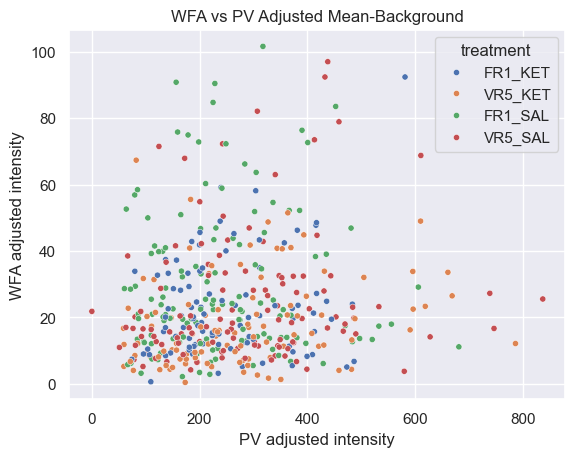

(560, 5)


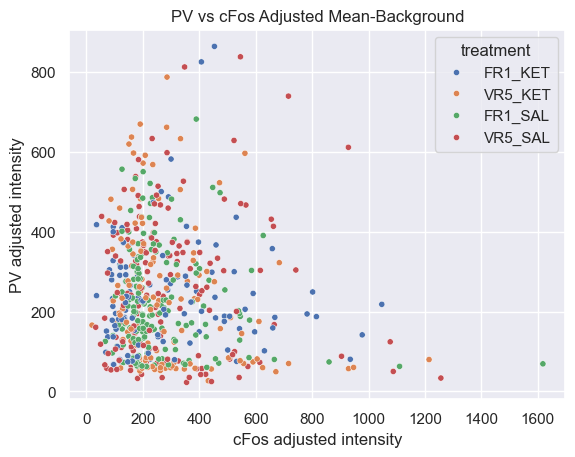

(409, 5)


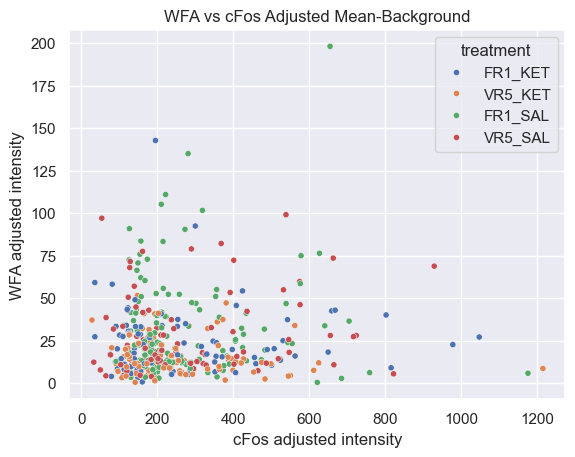

(3824, 5)


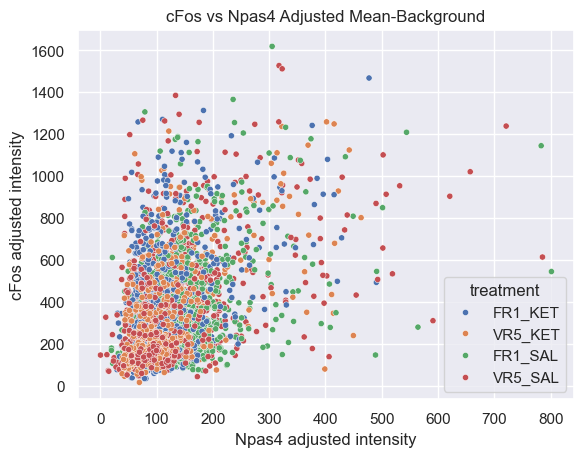

(514, 5)


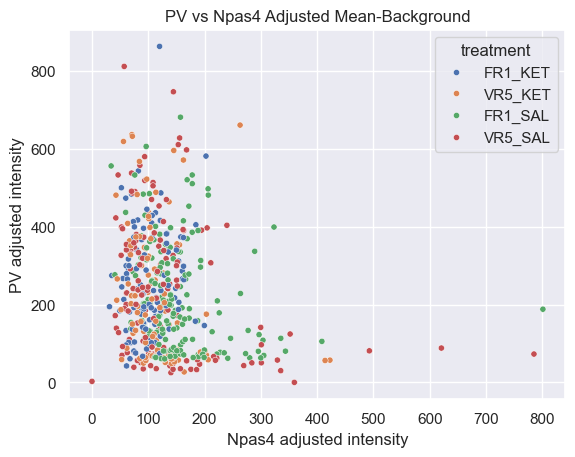

(326, 5)


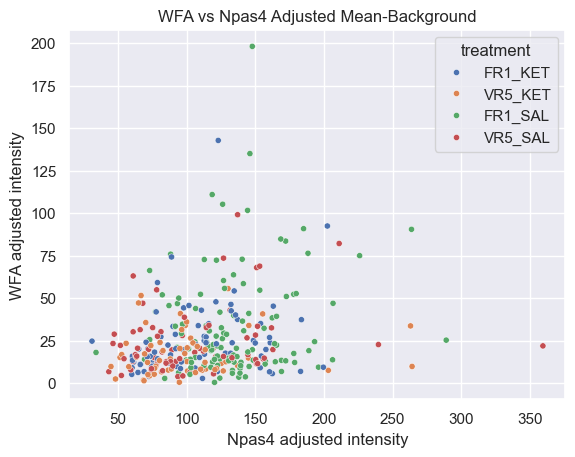

In [30]:
def intensity_scatter_plot(df_data, stain_X, stain_Y, query=False):
    if not query:
        q = df_data.query(f'dummy_{stain_X} == {True} and dummy_{stain_Y} == {True}\
                           and (stain_type == "{stain_X}" or stain_type == "{stain_Y}")')
    elif query:
        q = df_data.query(query)
    df_X = q.query(f'stain_type == "{stain_X}"')[
        ['image_name', 'true_grouping', 'treatment', 'adjusted_mean-background']
        ].rename(columns={'adjusted_mean-background': f'{stain_X} adjusted intensity'})
    df_Y = q.query(f'stain_type == "{stain_Y}"')[
        ['image_name', 'true_grouping', 'treatment', 'adjusted_mean-background']
        ].rename(columns={'adjusted_mean-background': f'{stain_Y} adjusted intensity'})

    df_X['id'] = list(zip(df_X.image_name.values, df_X.true_grouping.values))
    df_Y['id'] = list(zip(df_Y.image_name.values, df_Y.true_grouping.values))

    df_X = df_X.drop(['image_name', 'true_grouping'], axis=1)
    df_Y = df_Y.drop(['image_name', 'true_grouping'], axis=1)

    df_merge = df_X.merge(df_Y, on='id').rename(columns={'treatment_x': 'treatment'})
    print(df_merge.shape)

    sns.set_theme()
    sns.scatterplot(x=f'{stain_X} adjusted intensity', y=f'{stain_Y} adjusted intensity', hue='treatment', data=df_merge, s=20)
    plt.title(f'{stain_Y} vs {stain_X} Adjusted Mean-Background')
    plt.show()

intensity_scatter_plot(df_adjusted, 'PV', 'WFA')
intensity_scatter_plot(df_adjusted, 'cFos', 'PV')
intensity_scatter_plot(df_adjusted, 'cFos', 'WFA')
intensity_scatter_plot(df_adjusted, 'Npas4', 'cFos')
intensity_scatter_plot(df_adjusted, 'Npas4', 'PV')
intensity_scatter_plot(df_adjusted, 'Npas4', 'WFA')



# Some barplots and ANOVA
## Is adjusted WFA intensity different in PV vs Non-PV cells across treatments?
No, but there is a simple main effect of treatment, react and PV (+/-) (that is, each effect does not depend on the level of another)

                                      sum_sq     df          F    PR(>F)
C(treat)                         7124.460285    1.0  18.395097  0.000020
C(react)                         5357.884741    1.0  13.833864  0.000212
C(dummy_PV)                      3707.644630    1.0   9.573004  0.002036
C(treat):C(react)                 540.721974    1.0   1.396124  0.237687
C(react):C(dummy_PV)              497.943335    1.0   1.285672  0.257151
C(dummy_PV):C(treat)              385.890740    1.0   0.996356  0.318464
C(treat):C(react):C(dummy_PV)     363.260381    1.0   0.937925  0.333074
Residual                       346635.400430  895.0        NaN       NaN


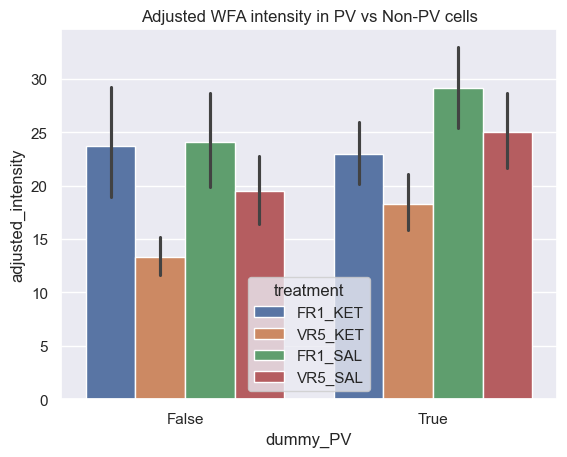

In [31]:
q = df_adjusted.query('stain_type == "WFA"').rename(columns={'adjusted_mean-background': 'adjusted_intensity'}).copy().reset_index()
q['treat'] = q.treatment.apply(lambda x: x.split('_')[0])
q['react'] = q.treatment.apply(lambda x: x.split('_')[1])
sns.barplot(x='dummy_PV', y='adjusted_intensity', data=q, hue='treatment')
plt.title('Adjusted WFA intensity in PV vs Non-PV cells')

# building model with all interaction terms
model = ols('adjusted_intensity ~ C(treat) + C(react) + C(dummy_PV)\
             + C(treat):C(react) + C(react):C(dummy_PV) + C(dummy_PV):C(treat)\
             + C(treat):C(react):C(dummy_PV)',
            data=q).fit() 
# perform 3 way ANOVA
result = sm.stats.anova_lm(model, typ=2) 
  
# Print the result 
print(result) 

## Is adjusted PV intensity different in WFA vs Non-WFA cells across treatments?
Yes, all interaction effects are significant. Basically, a three-way interaction means that one, or more, two-way interactions differ across the levels of a third variable. Something along the lines of "the interaction effect between treatment and react depends on whether or not a WFA net was present."

                                      sum_sq      df           F        PR(>F)
C(treat)                        1.138042e+05     1.0    6.085853  1.375929e-02
C(react)                        9.355445e+03     1.0    0.500296  4.795009e-01
C(dummy_WFA)                    2.322149e+06     1.0  124.180403  1.431371e-27
C(treat):C(react)               4.084862e+04     1.0    2.184441  1.396619e-01
C(react):C(dummy_WFA)           3.394226e+03     1.0    0.181511  6.701505e-01
C(dummy_WFA):C(treat)           5.494608e+04     1.0    2.938324  8.674676e-02
C(treat):C(react):C(dummy_WFA)  2.342998e+02     1.0    0.012530  9.108925e-01
Residual                        2.352435e+07  1258.0         NaN           NaN


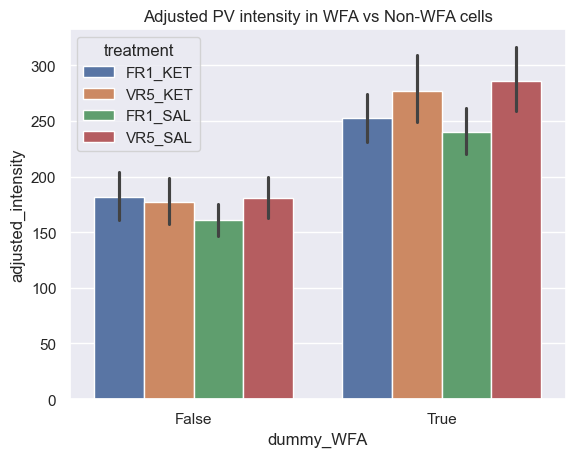

In [32]:
q = df_adjusted.query('stain_type == "PV"').rename(columns={'adjusted_mean-background': 'adjusted_intensity'}).copy().reset_index()
q['treat'] = q.treatment.apply(lambda x: x.split('_')[0])
q['react'] = q.treatment.apply(lambda x: x.split('_')[1])

sns.barplot(x='dummy_WFA', y='adjusted_intensity', data=q, hue='treatment')
plt.title('Adjusted PV intensity in WFA vs Non-WFA cells')

# performing 3way ANOVA 
model = ols('adjusted_intensity ~ C(treat) + C(react) + C(dummy_WFA)\
             + C(treat):C(react) + C(react):C(dummy_WFA) + C(dummy_WFA):C(treat)\
             + C(treat):C(react):C(dummy_WFA)',
            data=q).fit()
result = sm.stats.anova_lm(model, typ=2) 
  
# Print the result 
print(result) 

## Is adjusted Npas4 intensity different in PV vs Non-PV cells across treatments?
No, we do not have a significant three way interaction effect so in this case it would be better reduce the model and go with a 2-way ANOVA only. It looks like we will probably see a significant treatment by react effect.

                                     sum_sq      df           F        PR(>F)
C(treat)                       1.731267e+05     1.0   56.428112  6.422989e-14
C(react)                       6.491810e+05     1.0  211.591031  2.299029e-47
C(dummy_PV)                    1.540213e+05     1.0   50.200992  1.499079e-12
C(treat):C(react)              3.025261e+05     1.0   98.603951  4.125731e-23
C(react):C(dummy_PV)           4.685034e+04     1.0   15.270181  9.390251e-05
C(dummy_PV):C(treat)           5.202496e+02     1.0    0.169568  6.805067e-01
C(treat):C(react):C(dummy_PV)  6.167826e+03     1.0    2.010313  1.562700e-01
Residual                       2.594379e+07  8456.0         NaN           NaN


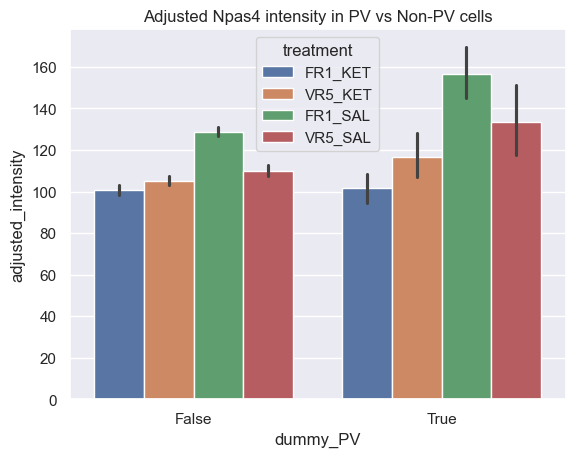

In [33]:
q = df_adjusted.query('stain_type == "Npas4"').rename(columns={'adjusted_mean-background': 'adjusted_intensity'}).copy().reset_index()
q['treat'] = q.treatment.apply(lambda x: x.split('_')[0])
q['react'] = q.treatment.apply(lambda x: x.split('_')[1])

sns.barplot(x='dummy_PV', y='adjusted_intensity', data=q, hue='treatment')
plt.title('Adjusted Npas4 intensity in PV vs Non-PV cells')

# performing 3way ANOVA 
model = ols('adjusted_intensity ~ C(treat) + C(react) + C(dummy_PV)\
             + C(treat):C(react) + C(react):C(dummy_PV) + C(dummy_PV):C(treat)\
             + C(treat):C(react):C(dummy_PV)',
            data=q).fit()
result = sm.stats.anova_lm(model, typ=2) 
  
# Print the result 
print(result) 

## Is adjusted PV intensity different in Npas4 vs Non-Npas4 cells across treatments? (PV+/Npas4+ vs PV+/Npas-)
Probably! We do see a three way interaction effeect and so we now need to investigate which of the 2 way effects is dependent on the the level of the third variable. Just from eyeballing the bar graph below, it could be that the interaction of treatment and reactivation depends on whether or not the PV cell had Npas4.

                                        sum_sq      df          F  \
C(treat)                          1.015755e+05     1.0   5.093936   
C(react)                          2.702966e+04     1.0   1.355518   
C(dummy_Npas4)                    6.641316e+05     1.0  33.305727   
C(treat):C(react)                 3.178882e+04     1.0   1.594187   
C(react):C(dummy_Npas4)           2.372515e+02     1.0   0.011898   
C(dummy_Npas4):C(treat)           6.634346e+04     1.0   3.327077   
C(treat):C(react):C(dummy_Npas4)  8.783783e+04     1.0   4.405005   
Residual                          2.508510e+07  1258.0        NaN   

                                        PR(>F)  
C(treat)                          2.418061e-02  
C(react)                          2.445365e-01  
C(dummy_Npas4)                    9.906904e-09  
C(treat):C(react)                 2.069630e-01  
C(react):C(dummy_Npas4)           9.131581e-01  
C(dummy_Npas4):C(treat)           6.838502e-02  
C(treat):C(react):C(dummy_Npas4)  3

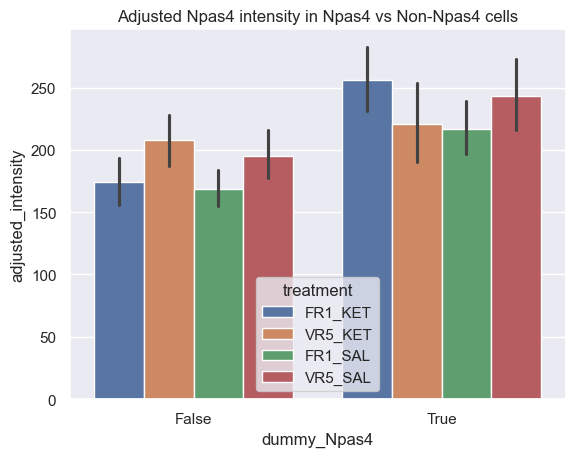

In [34]:
q = df_adjusted.query('stain_type == "PV"').rename(columns={'adjusted_mean-background': 'adjusted_intensity'}).copy().reset_index()
q['treat'] = q.treatment.apply(lambda x: x.split('_')[0])
q['react'] = q.treatment.apply(lambda x: x.split('_')[1])

sns.barplot(x='dummy_Npas4', y='adjusted_intensity', data=q, hue='treatment')
plt.title('Adjusted Npas4 intensity in Npas4 vs Non-Npas4 cells')

# performing 3way ANOVA 
model = ols('adjusted_intensity ~ C(treat) + C(react) + C(dummy_Npas4)\
             + C(treat):C(react) + C(react):C(dummy_Npas4) + C(dummy_Npas4):C(treat)\
             + C(treat):C(react):C(dummy_Npas4)',
            data=q).fit()
result = sm.stats.anova_lm(model, typ=2) 
  
# Print the result 
print(result) 

## Is adjusted Npas4 intensity different in WFA vs Non-WFA cells across combinations of react/treatment? (NO.)

                                      sum_sq      df           F        PR(>F)
C(treat)                        1.721251e+05     1.0   55.673121  9.406142e-14
C(react)                        6.497684e+05     1.0  210.164821  4.625151e-47
C(dummy_WFA)                    2.590144e+02     1.0    0.083777  7.722497e-01
C(treat):C(react)               3.027674e+05     1.0   97.928820  5.779170e-23
C(react):C(dummy_WFA)           8.104489e+02     1.0    0.262136  6.086697e-01
C(dummy_WFA):C(treat)           6.514152e+03     1.0    2.106975  1.466660e-01
C(treat):C(react):C(dummy_WFA)  2.649805e+02     1.0    0.085707  7.697149e-01
Residual                        2.614349e+07  8456.0         NaN           NaN


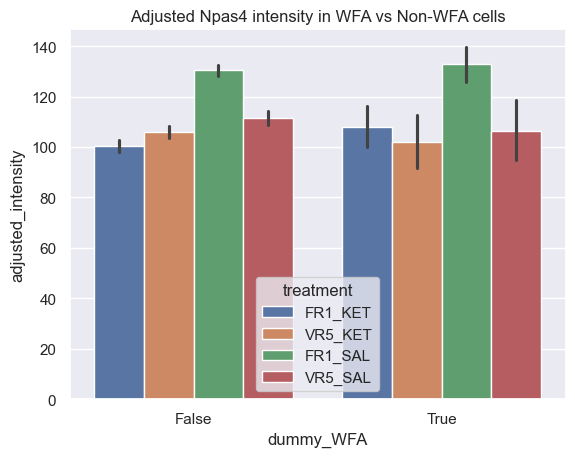

In [35]:
q = df_adjusted.query('stain_type == "Npas4"').rename(columns={'adjusted_mean-background': 'adjusted_intensity'}).copy().reset_index()
q['treat'] = q.treatment.apply(lambda x: x.split('_')[0])
q['react'] = q.treatment.apply(lambda x: x.split('_')[1])

sns.barplot(x='dummy_WFA', y='adjusted_intensity', data=q, hue='treatment')
plt.title('Adjusted Npas4 intensity in WFA vs Non-WFA cells')

# performing 3way ANOVA 
model = ols('adjusted_intensity ~ C(treat) + C(react) + C(dummy_WFA)\
             + C(treat):C(react) + C(react):C(dummy_WFA) + C(dummy_WFA):C(treat)\
             + C(treat):C(react):C(dummy_WFA)',
            data=q).fit()
result = sm.stats.anova_lm(model, typ=2) 
  
# Print the result 
print(result) 

## Is adjusted WFA intensity different in Npas4 vs Non-Npas4 cells across combinations of react/treatment? (NO.)

                                         sum_sq     df          F    PR(>F)
C(treat)                            5134.437216    1.0  13.453051  0.000259
C(react)                            5106.416587    1.0  13.379632  0.000269
C(dummy_Npas4)                      6354.283192    1.0  16.649244  0.000049
C(treat):C(react)                    740.744029    1.0   1.940868  0.163920
C(react):C(dummy_Npas4)             1377.507479    1.0   3.609291  0.057779
C(dummy_Npas4):C(treat)             1424.534954    1.0   3.732511  0.053678
C(treat):C(react):C(dummy_Npas4)     595.067648    1.0   1.559173  0.212113
Residual                          341582.091144  895.0        NaN       NaN


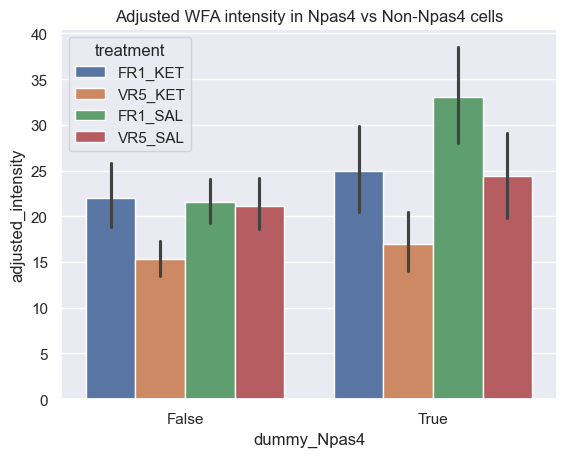

In [36]:
q = df_adjusted.query('stain_type == "WFA"').rename(columns={'adjusted_mean-background': 'adjusted_intensity'}).copy().reset_index()
q['treat'] = q.treatment.apply(lambda x: x.split('_')[0])
q['react'] = q.treatment.apply(lambda x: x.split('_')[1])

sns.barplot(x='dummy_Npas4', y='adjusted_intensity', data=q, hue='treatment')
plt.title('Adjusted WFA intensity in Npas4 vs Non-Npas4 cells')

# performing 3way ANOVA 
model = ols('adjusted_intensity ~ C(treat) + C(react) + C(dummy_Npas4)\
             + C(treat):C(react) + C(react):C(dummy_Npas4) + C(dummy_Npas4):C(treat)\
             + C(treat):C(react):C(dummy_Npas4)',
            data=q).fit()
result = sm.stats.anova_lm(model, typ=2) 
  
# Print the result 
print(result) 

## Is adjusted cFos intensity different in PV vs Non-PV cells across treatments? (cFos+/PV+ vs cFos+/PV-)
No, we only see a significant 2 way interaction between treatment and reactivation that does not depend on whether or not PV was present.

                                     sum_sq      df          F        PR(>F)
C(treat)                       8.848084e+04     1.0   2.153245  1.423083e-01
C(react)                       1.733924e+05     1.0   4.219631  3.999132e-02
C(dummy_PV)                    2.325871e+04     1.0   0.566018  4.518680e-01
C(treat):C(react)              1.127914e+06     1.0  27.448605  1.654435e-07
C(react):C(dummy_PV)           2.718370e+04     1.0   0.661535  4.160428e-01
C(dummy_PV):C(treat)           1.859282e+04     1.0   0.452470  5.011839e-01
C(treat):C(react):C(dummy_PV)  2.032199e+03     1.0   0.049455  8.240200e-01
Residual                       3.283650e+08  7991.0        NaN           NaN


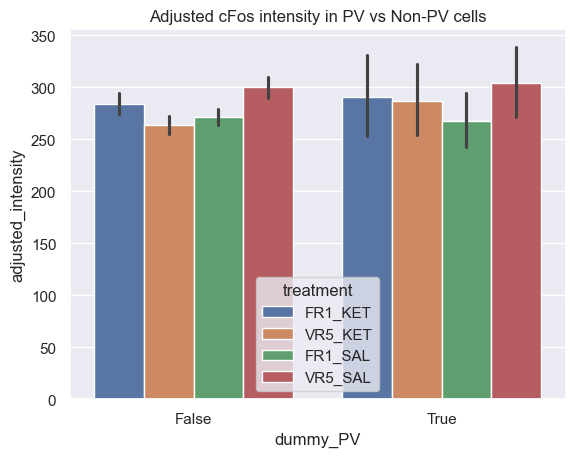

In [37]:
q = df_adjusted.query('stain_type == "cFos"').rename(columns={'adjusted_mean-background': 'adjusted_intensity'}).copy().reset_index()
q['treat'] = q.treatment.apply(lambda x: x.split('_')[0])
q['react'] = q.treatment.apply(lambda x: x.split('_')[1])

sns.barplot(x='dummy_PV', y='adjusted_intensity', data=q, hue='treatment')
plt.title('Adjusted cFos intensity in PV vs Non-PV cells')

# performing 3way ANOVA 
model = ols('adjusted_intensity ~ C(treat) + C(react) + C(dummy_PV)\
             + C(treat):C(react) + C(react):C(dummy_PV) + C(dummy_PV):C(treat)\
             + C(treat):C(react):C(dummy_PV)',
            data=q).fit()
result = sm.stats.anova_lm(model, typ=2) 
  
# Print the result 
print(result) 

## Is adjusted PV intensity different in cFos vs Non-cFos cells across treatments? (PV+/cFos+ vs PV+/cFos-)
No, we only have independent simple main effects of treatment and PV +/-.

                                       sum_sq      df          F        PR(>F)
C(treat)                         9.529077e+04     1.0   4.835951  2.805373e-02
C(react)                         1.391501e+04     1.0   0.706178  4.008751e-01
C(dummy_cFos)                    1.061472e+06     1.0  53.869090  3.833371e-13
C(treat):C(react)                3.070918e+04     1.0   1.558473  2.121212e-01
C(react):C(dummy_cFos)           2.467093e+04     1.0   1.252035  2.633777e-01
C(dummy_cFos):C(treat)           1.246284e+04     1.0   0.632482  4.265964e-01
C(treat):C(react):C(dummy_cFos)  1.796172e+04     1.0   0.911547  3.398878e-01
Residual                         2.478846e+07  1258.0        NaN           NaN


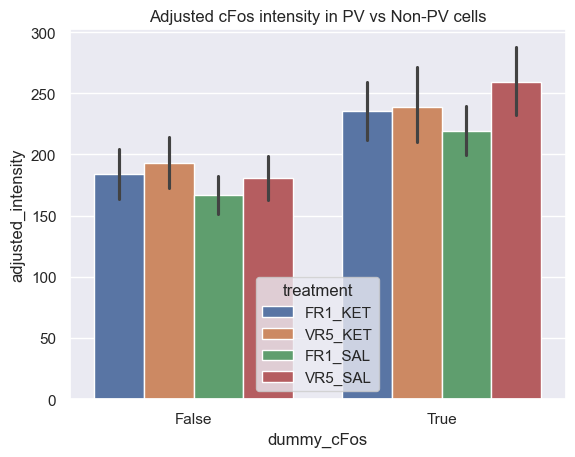

In [38]:
q = df_adjusted.query('stain_type == "PV"').rename(columns={'adjusted_mean-background': 'adjusted_intensity'}).copy().reset_index()
q['treat'] = q.treatment.apply(lambda x: x.split('_')[0])
q['react'] = q.treatment.apply(lambda x: x.split('_')[1])

sns.barplot(x='dummy_cFos', y='adjusted_intensity', data=q, hue='treatment')
plt.title('Adjusted cFos intensity in PV vs Non-PV cells')

# performing 3way ANOVA 
model = ols('adjusted_intensity ~ C(treat) + C(react) + C(dummy_cFos)\
             + C(treat):C(react) + C(react):C(dummy_cFos) + C(dummy_cFos):C(treat)\
             + C(treat):C(react):C(dummy_cFos)',
            data=q).fit()
result = sm.stats.anova_lm(model, typ=2) 
  
# Print the result 
print(result) 

# Three stain type interactions

## Is Npas4 intensity different in PV cells with or without WFA nets? 
### Npas4+/PV+/WFA+ vs Npas4+/PV+/WFA-
## YES
we can interpret this as: the interaction between react and treatment depends on whether or not a Npas4+/PV+ cell was also WFA+.

                                      sum_sq     df          F        PR(>F)
C(treat)                        1.441977e+04    1.0   2.642340  1.046680e-01
C(react)                        1.569748e+05    1.0  28.764722  1.241371e-07
C(dummy_WFA)                    9.944630e+04    1.0  18.222962  2.343607e-05
C(treat):C(react)               5.852152e+04    1.0  10.723732  1.129554e-03
C(react):C(dummy_WFA)           5.153389e+04    1.0   9.443289  2.232568e-03
C(dummy_WFA):C(treat)           7.989842e+03    1.0   1.464093  2.268406e-01
C(treat):C(react):C(dummy_WFA)  1.492823e+04    1.0   2.735512  9.875538e-02
Residual                        2.783171e+06  510.0        NaN           NaN


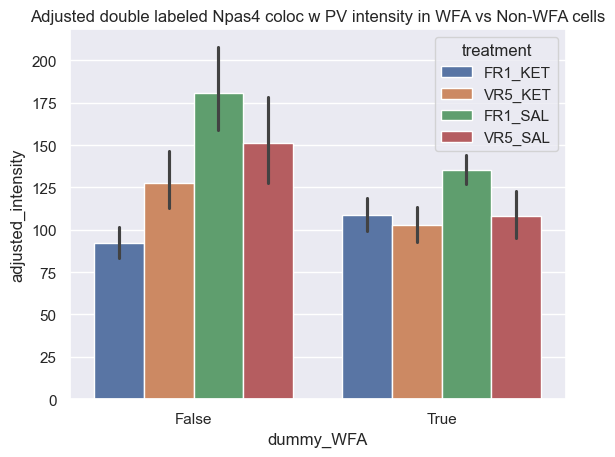

In [39]:
q = df_adjusted.query('stain_type == "Npas4" and dummy_PV == True').rename(columns={'adjusted_mean-background': 'adjusted_intensity'}).copy().reset_index()
q['treat'] = q.treatment.apply(lambda x: x.split('_')[0])
q['react'] = q.treatment.apply(lambda x: x.split('_')[1])

sns.barplot(x='dummy_WFA', y='adjusted_intensity', data=q, hue='treatment')
plt.title('Adjusted double labeled Npas4 coloc w PV intensity in WFA vs Non-WFA cells')

# performing 3way ANOVA 
model = ols('adjusted_intensity ~ C(treat) + C(react) + C(dummy_WFA)\
             + C(treat):C(react) + C(react):C(dummy_WFA) + C(dummy_WFA):C(treat)\
             + C(treat):C(react):C(dummy_WFA)',
            data=q).fit()
result = sm.stats.anova_lm(model, typ=2) 
  
# Print the result 
print(result) 

## Is cFos intensity different in PV cells with or without WFA nets? 
### cFos+/PV+/WFA+ vs cFos+/PV+/WFA-
## NO.

                                      sum_sq     df         F    PR(>F)
C(treat)                        4.307610e+04    1.0  1.103221  0.294010
C(react)                        1.884221e+03    1.0  0.048257  0.826204
C(dummy_WFA)                    1.080859e+05    1.0  2.768186  0.096711
C(treat):C(react)               5.209656e+04    1.0  1.334244  0.248541
C(react):C(dummy_WFA)           2.371475e+04    1.0  0.607358  0.436111
C(dummy_WFA):C(treat)           9.917844e+03    1.0  0.254006  0.614465
C(treat):C(react):C(dummy_WFA)  1.167873e+04    1.0  0.299104  0.584661
Residual                        2.202181e+07  564.0       NaN       NaN


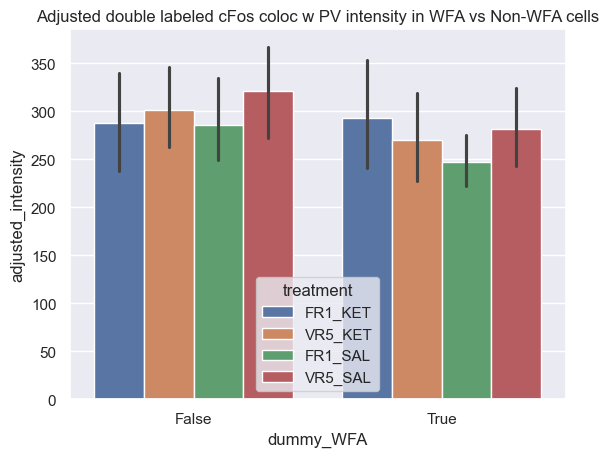

In [40]:
q = df_adjusted.query('stain_type == "cFos" and dummy_PV == True').rename(columns={'adjusted_mean-background': 'adjusted_intensity'}).copy().reset_index()
q['treat'] = q.treatment.apply(lambda x: x.split('_')[0])
q['react'] = q.treatment.apply(lambda x: x.split('_')[1])

sns.barplot(x='dummy_WFA', y='adjusted_intensity', data=q, hue='treatment')
plt.title('Adjusted double labeled cFos coloc w PV intensity in WFA vs Non-WFA cells')

# performing 3way ANOVA 
model = ols('adjusted_intensity ~ C(treat) + C(react) + C(dummy_WFA)\
             + C(treat):C(react) + C(react):C(dummy_WFA) + C(dummy_WFA):C(treat)\
             + C(treat):C(react):C(dummy_WFA)',
            data=q).fit()
result = sm.stats.anova_lm(model, typ=2) 
  
# Print the result 
print(result) 

# In cFos/Npas4 high/low intensity cells, is PV/WFA intensity different across treatment/react groups?

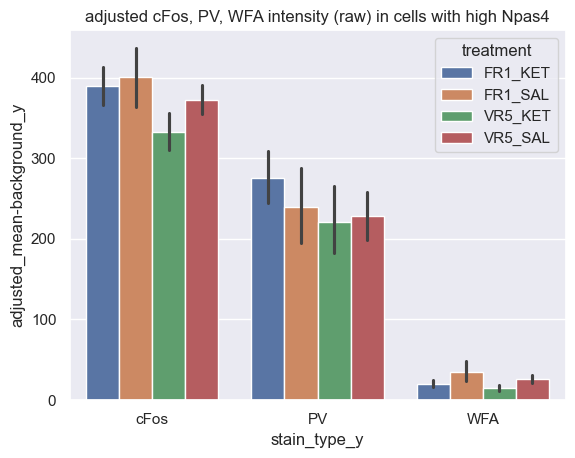

Text(0.5, 1.0, 'adjusted cFos, PV, WFA intensity (raw) in cells with low Npas4')

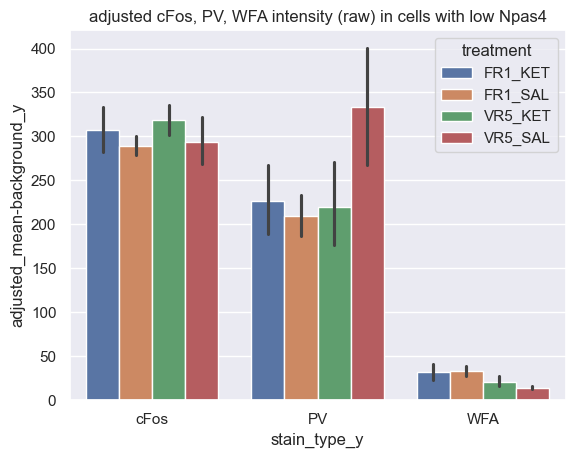

In [74]:
df_Npas4_merge = df_Npas4.merge(
    df_adjusted[df_adjusted.stain_type != 'Npas4'][['image_name', 'true_grouping', 'adjusted_mean-background', 'stain_type']]
    , on=['image_name', 'true_grouping']
    )

# wasn't sure if I should normalize to just the Npas4_high subset
# these data area double, triple and quad labeled cells: query criteria was 
# any cell with Npas4_high and any other stain.
# so if i normalized, the stain

sns.barplot(x='stain_type_y', y='adjusted_mean-background_y', hue='treatment', data=df_Npas4_merge.query('Npas4_bin == "Npas4_high"').sort_values(by='treatment'))
plt.title('adjusted cFos, PV, WFA intensity (raw) in cells with high Npas4')
plt.show()

sns.barplot(x='stain_type_y', y='adjusted_mean-background_y', hue='treatment', data=df_Npas4_merge.query('Npas4_bin == "Npas4_low"').sort_values(by='treatment'))
plt.title('adjusted cFos, PV, WFA intensity (raw) in cells with low Npas4')

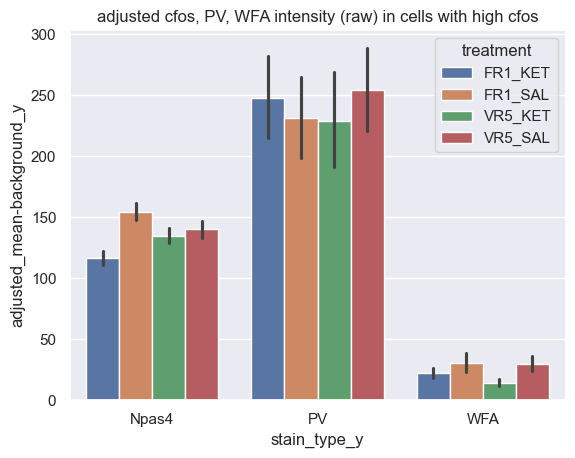

Text(0.5, 1.0, 'adjusted cFos, PV, WFA intensity (raw) in cells with low cFos')

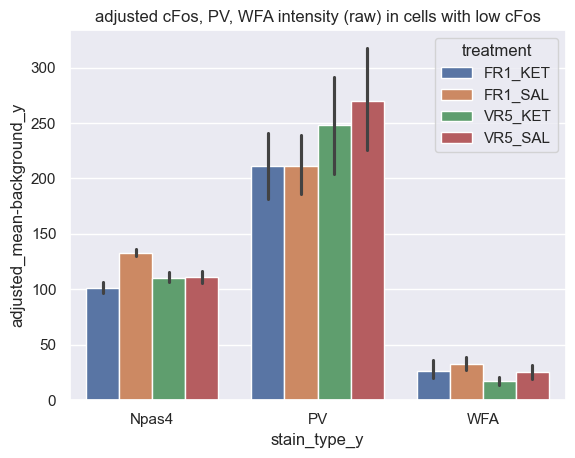

In [79]:
df_cfos_merge = df_cfos.merge(
    df_adjusted[df_adjusted.stain_type != 'cFos'][['image_name', 'true_grouping', 'adjusted_mean-background', 'stain_type']]
    , on=['image_name', 'true_grouping']
    )

# wasn't sure if I should normalize to just the cFos_high subset
# these data area double, triple and quad labeled cells: query criteria was 
# any cell with cFos_high and any other stain.
# so if i normalized, the stain

sns.barplot(x='stain_type_y', y='adjusted_mean-background_y', hue='treatment', data=df_cfos_merge.query('cfos_bin == "cfos_high"').sort_values(by=['treatment','stain_type_y']))
plt.title('adjusted cfos, PV, WFA intensity (raw) in cells with high cfos')
plt.show()

sns.barplot(x='stain_type_y', y='adjusted_mean-background_y', hue='treatment', data=df_cfos_merge.query('cfos_bin == "cfos_low"').sort_values(by=['treatment', 'stain_type_y']))
plt.title('adjusted cFos, PV, WFA intensity (raw) in cells with low cFos')

In [77]:
df_cfos

index                   filename           image_name            roi_id  \
0         0  KET-10-12_PFC_3.7_A_3.tif  KET-10-12_PFC_3.7_A  0-005-00000_cFos   
1         1  KET-10-12_PFC_3.7_A_3.tif  KET-10-12_PFC_3.7_A  0-005-00001_cFos   
2         2  KET-10-12_PFC_3.7_A_3.tif  KET-10-12_PFC_3.7_A  0-005-00002_cFos   
3         3  KET-10-12_PFC_3.7_A_3.tif  KET-10-12_PFC_3.7_A  0-005-00003_cFos   
4         4  KET-10-12_PFC_3.7_A_3.tif  KET-10-12_PFC_3.7_A  0-005-00004_cFos   
...     ...                        ...                  ...               ...   
7994   7994    PE-13-9_PFC_4.0_B_3.tif    PE-13-9_PFC_4.0_B  0-FFF-00026_cFos   
7995   7995    PE-13-9_PFC_4.0_B_3.tif    PE-13-9_PFC_4.0_B  0-FFF-00027_cFos   
7996   7996    PE-13-9_PFC_4.0_B_3.tif    PE-13-9_PFC_4.0_B  0-FFF-00028_cFos   
7997   7997    PE-13-9_PFC_4.0_B_3.tif    PE-13-9_PFC_4.0_B  0-FFF-00029_cFos   
7998   7998    PE-13-9_PFC_4.0_B_3.tif    PE-13-9_PFC_4.0_B  0-FFF-00030_cFos   

                                          true_grouping  dummy_PV  dummy_cFos  \
0                 (0-005-00000_cFos, 0-FFF-00006_Npas4)     False        True   
1                                   (0-005-00001_cFos,)     False        True   
2                 (0-005-00002_cFos, 0-FFF-00064_Npas4)     False        True   
3                 (0-005-00003_cFos, 0-FFF-00038_Npas4)     False        True   
4     (0-000-00010_PV, 0-005-00004_cFos, 0-FFF-00049...      True        True   
...                                                 ...       ...         ...   
7994                                (0-FFF-00026_cFos,)     False        True   
7995                                (0-FFF-00027_cFos,)     False        True   
7996                                (0-FFF-00028_cFos,)     False        True   
7997                 (0-000-00004_PV, 0-FFF-00029_cFos)      True        True   
7998                                (0-FFF-00030_cFos,)     False        True   

      dummy_Npas4  dummy_WFA   CoM_x  ...  stain_type  \
0            True      False  127.57  ...        cFos   
1           False      False  364.94  ...        cFos   
2            True      False  177.76  ...        cFos   
3            True      False  332.28  ...        cFos   
4            True      False  418.08  ...        cFos   
...           ...        ...     ...  ...         ...   
7994        False      False   82.81  ...        cFos   
7995        False      False  185.73  ...        cFos   
7996        False      False  343.07  ...        cFos   
7997        False      False    8.90  ...        cFos   
7998        False      False    5.37  ...        cFos   

                       filename      rat_n treatment group_name       snr  \
0     KET-10-12_PFC_3.7_A_3.tif  KET-10-12   FR1_KET     KET-10  1.307402   
1     KET-10-12_PFC_3.7_A_3.tif  KET-10-12   FR1_KET     KET-10  1.164790   
2     KET-10-12_PFC_3.7_A_3.tif  KET-10-12   FR1_KET     KET-10  1.042955   
3     KET-10-12_PFC_3.7_A_3.tif  KET-10-12   FR1_KET     KET-10  2.014691   
4     KET-10-12_PFC_3.7_A_3.tif  KET-10-12   FR1_KET     KET-10  1.044801   
...                         ...        ...       ...        ...       ...   
7994    PE-13-9_PFC_4.0_B_3.tif    PE-13-9   VR5_SAL      PE-13  0.737265   
7995    PE-13-9_PFC_4.0_B_3.tif    PE-13-9   VR5_SAL      PE-13  0.890975   
7996    PE-13-9_PFC_4.0_B_3.tif    PE-13-9   VR5_SAL      PE-13  1.553265   
7997    PE-13-9_PFC_4.0_B_3.tif    PE-13-9   VR5_SAL      PE-13  0.730926   
7998    PE-13-9_PFC_4.0_B_3.tif    PE-13-9   VR5_SAL      PE-13  0.733005   

     mean-background adjusted_mean-background       coloc_stain_type  \
0         137.817322               342.105042     cFos_coloc_w_Npas4   
1          73.880188               278.167908            lonely_cFos   
2          19.258118               223.545837     cFos_coloc_w_Npas4   
3         454.914795               659.202515     cFos_coloc_w_Npas4   
4          20.085602               224.373322  cFos_coloc_w_PV,Npas4   
...              .